In [2]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
#install.packages('survminer')

also installing the dependencies ‘bit’, ‘bit64’, ‘clipr’, ‘vroom’, ‘tzdb’, ‘rematch’, ‘prettyunits’, ‘matrixStats’, ‘RcppArmadillo’, ‘forcats’, ‘hms’, ‘readr’, ‘cellranger’, ‘progress’, ‘zip’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘foreign’, ‘haven’, ‘curl’, ‘readxl’, ‘openxlsx’, ‘boot’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘nnet’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘mime’, ‘bitops’, ‘nlme’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘colorspace’, ‘lattice’, ‘stringi’, ‘highr’, ‘markdown’, ‘yaml’, ‘xfun’, ‘RCurl’, ‘png’, ‘jpeg’, ‘xml2’, ‘gtable’, ‘isoband’, ‘MASS’, ‘mgcv’, ‘withr’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘farver’, ‘labeling’, ‘munsell’, ‘R6’, ‘RColorBrewer’, ‘viridisLite’, ‘Matrix’, ‘backports’, ‘generics’, ‘stringr’, ‘tidyselect’, ‘cpp11’, ‘knitr’, ‘KMsurv’, ‘data.table’, ‘zoo’, ‘km.ci’, ‘xtable’, ‘pkgconfig’, ‘gridtext’, ‘ggplot2’, ‘ggpubr’, ‘gridExtra’, ‘magrittr’, ‘maxstat’, ‘sca

In [1]:
library(org.Hs.eg.db)
library(limma)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(survival)
library(survminer)
library(gplots)
library(RColorBrewer)
library(cowplot)
EG2SYM <- toTable(org.Hs.egSYMBOL)
extra_anno <- data.frame(gene_id=c(6890, 6891, 883, 56267, 7067, 7068),
                         symbol=c("ABCB2", "ABCB3", "CCBL1", "CCBL2", "THRCA", "THRCB"))
EG2SYM <- rbind(EG2SYM, extra_anno)

ENS2EG <- toTable(org.Hs.egENSEMBL2EG)
ENS2EG2SYM <- cbind.data.frame(EG2SYM, ENS2EG[match(EG2SYM$gene_id, ENS2EG$gene_id),])


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welco

In [2]:
brin_ADME_nodes <- read.csv(file="./data/Rosenthal_2019Pub_ADME List.txt", sep="\t", header=FALSE)
colnames(brin_ADME_nodes) <- "Sym"
brin_ADME_nodes$EGID <- ENS2EG2SYM$gene_id[match(brin_ADME_nodes$Sym, ENS2EG2SYM$symbol)]
brin_ADME_nodes$ENSID <- ENS2EG2SYM$ensembl_id[match(brin_ADME_nodes$Sym, ENS2EG2SYM$symbol)]
brin_ADME_nodes <- rbind.data.frame(brin_ADME_nodes[!is.na(brin_ADME_nodes$EGID),], 
                                    data.frame(Sym=c("CCN1","SLC49A4", "SLC49A3", "SLC35E2A", "NAA80"),
                                               EGID=c("3491", "84925","84179", "9906", "24142"),
                                               ENSID=c("ENSG00000142871", "ENSG00000138463", "ENSG00000169026", 
                                                       "ENSG00000215790", "ENSG00000243477"))) 

clin_data <- read.csv(file="./data/TCGA_RNASeq/clinical.tsv", 
                      sep="\t", header=TRUE, stringsAsFactors = FALSE)
clin_data3 <- clin_data[!duplicated(clin_data[,-c(152:154)]),]
clin_data_filt <- clin_data3[grep("TCGA", clin_data3$project_id),]
clin_data.l <- split(clin_data_filt, clin_data_filt$project_id)
all_SLC22_nodes.df <- EG2SYM[grep("SLC22A", EG2SYM$symbol),]


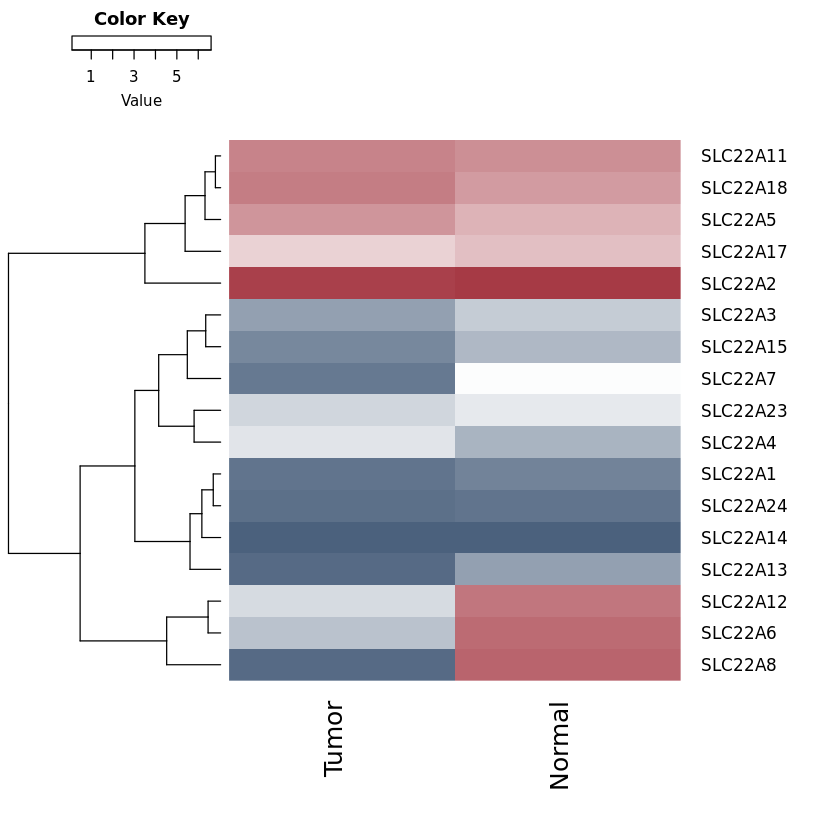

In [3]:
Tum_Norm_KIRC_KIRP <- read.table(file="./data/TCGA_KIRC_KIRP_TumorNormalSLC22geneExp.txt", sep="\t", header=TRUE)
Tum_Norm_KIRC <- Tum_Norm_KIRC_KIRP[,2:3]
Tum_Norm_KIRP <- Tum_Norm_KIRC_KIRP[,5:6]
rownames(Tum_Norm_KIRC) <- rownames(Tum_Norm_KIRP) <- Tum_Norm_KIRC_KIRP[,1]
mycol = colorpanel(1000, "#4B617D", "white", "#a63a45")
#pdf(file="Nigam_KIRC_SLC22_TumorNormalHeatmap_05262021.pdf", width=7, height=8)
#png(file="Nigam_KIRC_SLC22_TumorNormalHeatmap_06252021.png", width=7, height=8, res=300, units="in")
heatmap.2(as.matrix(Tum_Norm_KIRC), dendrogram="row", density.info="none", trace="none",
          labCol=c("Normal", "Tumor"), col=mycol, margin=c(8,8), lhei=c(2,10), cexCol=1.5)
#dev.off()

## KIRC

In [5]:
#KIRC_data <- read.table(file="./data/TCGA_RNASeq/KIRC.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt", 
#                        sep="\t", header=TRUE, stringsAsFactors = FALSE)
#saveRDS(KIRC_data, "KIRC_data.rds")
KIRC_data <- readRDS("./data/TCGA_RNASeq/KIRC_data.rds")
KIRC_data_rows <- KIRC_data[,1]
KIRC_data_rows_filt <- gsub("^\\?\\|","", KIRC_data_rows)
KIRC_data_rows_filt2 <- cbind.data.frame(symbol=unlist(lapply(strsplit(KIRC_data_rows_filt[-1], split="\\|"), 
                                                              function(x) ifelse(length(x) > 1, x[[1]], NA))), 
                                         gene_id=unlist(lapply(strsplit(KIRC_data_rows_filt[-1], split="\\|"), 
                                                               function(x) ifelse(length(x) > 1, x[[2]], x[[1]]))))

KIRC_sample_names <- colnames(KIRC_data[,-1])
KIRC_sample_names_filt <- unlist(lapply(strsplit(KIRC_sample_names, split="\\."), function(x) {
  paste(x[[1]], x[[2]], x[[3]], sep="-")
}))


In [6]:
KIRC_data_tumor <- KIRC_data[-1,-1][, !unlist(lapply(strsplit(KIRC_sample_names, split="\\."), function(x) x[[4]])) %in% c("11A", "05A")]

KIRC_data_tumor <- as.data.frame(apply(KIRC_data_tumor, 2, as.numeric))
rownames(KIRC_data_tumor) <- as.character(KIRC_data_rows_filt2$gene_id)
KIRC_data_tumor_rs <- rowSums(KIRC_data_tumor>100)
KIRC_data_tumor_thr <- ncol(KIRC_data_tumor)/2
KIRC_data_tumor_thrfilt <- KIRC_data_tumor[which(KIRC_data_tumor_rs > KIRC_data_tumor_thr),]
KIRC_data_rows_filt2b <- KIRC_data_rows_filt2[which(KIRC_data_tumor_rs > KIRC_data_tumor_thr),]
KIRC_data_tumor_log <- apply(KIRC_data_tumor_thrfilt, 2, function(x) log2(as.numeric(x) + 0.0001))
rownames(KIRC_data_tumor_log) <- rownames(KIRC_data_tumor_thrfilt)

KIRC_tumor_sample_names <- colnames(KIRC_data_tumor_log)
KIRC_tumor_sample_names_filt <- unlist(lapply(strsplit(KIRC_tumor_sample_names, split="\\."), function(x) {
  paste(x[[1]], x[[2]], x[[3]], sep="-")
}))
                             
KIRC_data_tumor_filt <- KIRC_data_tumor_thrfilt[,KIRC_tumor_sample_names_filt %in% clin_data3$case_submitter_id]
rownames(KIRC_data_tumor_filt) <- KIRC_data_rows_filt2b$gene_id
KIRC_tumor_filt_sample_names <- colnames(KIRC_data_tumor_filt)
KIRC_tumor_filt_sample_names_filt <- unlist(lapply(strsplit(KIRC_tumor_filt_sample_names, split="\\."), function(x) {
  paste(x[[1]], x[[2]], x[[3]], sep="-")
}))
                             
KIRC_data_tumor_rs_orig <- rowSums(KIRC_data_tumor > 01)
KIRC_data_rows_filt_orig <- KIRC_data_rows_filt2[which(KIRC_data_tumor_rs_orig > KIRC_data_tumor_thr),]
KIRC_data_tumor_thrfilt_orig <- KIRC_data_tumor[which(KIRC_data_tumor_rs_orig > KIRC_data_tumor_thr),]
KIRC_data_tumor_filt_orig <- KIRC_data_tumor_thrfilt_orig[,KIRC_tumor_sample_names_filt %in% clin_data3$case_submitter_id]
rownames(KIRC_data_tumor_filt_orig) <- KIRC_data_rows_filt_orig$gene_id

In [7]:
KIRC_clin_data_tumor_filt <- clin_data3[match(KIRC_tumor_filt_sample_names_filt, clin_data3$case_submitter_id),]
KIRC_clin_data_tumor_filt$ajcc_pathologic_m <- factor(as.character(KIRC_clin_data_tumor_filt$ajcc_pathologic_m),
                                                      levels=c("'--", "MX", "M0", "M1"))
KIRC_clin_data_tumor_filt$ajcc_pathologic_n <- factor(as.character(KIRC_clin_data_tumor_filt$ajcc_pathologic_n),
                                                      levels=c("'--", "NX", "N0", "N1"))
KIRC_clin_data_tumor_filt$ajcc_pathologic_stage <- factor(gsub(" ", "", as.character(KIRC_clin_data_tumor_filt$ajcc_pathologic_stage)),
                                                          levels=c("'--", "StageI", "StageII", "StageIII", "StageIV"))
KIRC_clin_data_tumor_filt$ajcc_pathologic_t <- factor(gsub("T3c", "T4", as.character(KIRC_clin_data_tumor_filt$ajcc_pathologic_t)),
                                                      levels=c("T1", "T1a","T1b", "T2", "T2a", "T2b",
                                                               "T3", "T3a","T3b","T4"))
KIRC_clin_data_tumor_filt$race <- factor(gsub(" ", "_", gsub("american indian or alaska native", "indig", 
                                                             gsub("black or african american", "black", 
                                                                  as.character(KIRC_clin_data_tumor_filt$race)))), 
                                         levels=c("indig", "asian", "black", "not_reported", "white"))
KIRC_clin_data_tumor_filt$gender <- factor(as.character(KIRC_clin_data_tumor_filt$gender), 
                                           levels=c("male", "female"))
KIRC_clin_data_tumor_filt$age_at_index <- as.numeric(KIRC_clin_data_tumor_filt$age_at_index)
KIRC_data_tumor_filt_m <- KIRC_data_tumor_filt[,!KIRC_clin_data_tumor_filt$ajcc_pathologic_m %in% c(NA, "'--")]
KIRC_clin_data_tumor_filt_m <- subset(KIRC_clin_data_tumor_filt, ajcc_pathologic_m != "'--")
KIRC_clin_data_tumor_filt_m <- droplevels(KIRC_clin_data_tumor_filt_m)
KIRC_design_m <- model.matrix(~0 + KIRC_clin_data_tumor_filt_m$ajcc_pathologic_m)
KIRC_voom_m <- KIRC_voom <- voom(as.matrix(KIRC_data_tumor_filt_m), KIRC_design_m)

KIRC_data_tumor_filt_n <- KIRC_data_tumor_filt[,!KIRC_clin_data_tumor_filt$ajcc_pathologic_n %in% c(NA, "'--")]
KIRC_clin_data_tumor_filt_n <- subset(KIRC_clin_data_tumor_filt, ajcc_pathologic_n != NA | ajcc_pathologic_n != "'--")
KIRC_clin_data_tumor_filt_n <- droplevels(KIRC_clin_data_tumor_filt_n)
KIRC_design_n <- model.matrix(~0 + KIRC_clin_data_tumor_filt_n$ajcc_pathologic_n)
KIRC_voom_n <- voom(as.matrix(KIRC_data_tumor_filt_n), KIRC_design_n)

KIRC_data_tumor_filt_stage <- KIRC_data_tumor_filt[,!KIRC_clin_data_tumor_filt$ajcc_pathologic_stage %in% c(NA, "'--")]
KIRC_clin_data_tumor_filt_stage <- subset(KIRC_clin_data_tumor_filt, ajcc_pathologic_stage != "'--" | ajcc_pathologic_stage != NA)
KIRC_clin_data_tumor_filt_stage <- droplevels(KIRC_clin_data_tumor_filt_stage)
KIRC_design_stage <- model.matrix(~0 + KIRC_clin_data_tumor_filt_stage$ajcc_pathologic_stage)
KIRC_voom_stage <- voom(as.matrix(KIRC_data_tumor_filt_stage), KIRC_design_stage)

KIRC_data_tumor_filt_t <- KIRC_data_tumor_filt[,!KIRC_clin_data_tumor_filt$ajcc_pathologic_t %in% c(NA, "'--", "T3c")]
KIRC_clin_data_tumor_filt_t <- subset(KIRC_clin_data_tumor_filt, ajcc_pathologic_t != "T3c")
KIRC_clin_data_tumor_filt_t <- droplevels(KIRC_clin_data_tumor_filt_t)
KIRC_design_t <- model.matrix(~0 + KIRC_clin_data_tumor_filt_t$ajcc_pathologic_t)
KIRC_voom_t <- voom(as.matrix(KIRC_data_tumor_filt_t), KIRC_design_t)



In [8]:
## with Race, Gender, & Age
KIRC_filt_age <- which(is.na(KIRC_clin_data_tumor_filt$age_at_index))
KIRC_data_tumor_filt_age <- KIRC_data_tumor_filt
KIRC_clin_data_tumor_filt_age <- KIRC_clin_data_tumor_filt

KIRC_data_tumor_filt_age <- KIRC_data_tumor_filt_age
KIRC_clin_data_tumor_filt_race_age_gen <- KIRC_clin_data_tumor_filt_age
KIRC_clin_data_tumor_filt_race_age_gen <- droplevels(KIRC_clin_data_tumor_filt_race_age_gen)
KIRC_design_race_age_gen <- model.matrix(~0 + race + age_at_index + gender, 
                                   data=KIRC_clin_data_tumor_filt_race_age_gen)
KIRC_voom_race_age_gen <- voom(as.matrix(KIRC_data_tumor_filt_age), KIRC_design_race_age_gen, plot=FALSE)

KIRC_data_tumor_filt_age_m <- KIRC_data_tumor_filt_age[,!KIRC_clin_data_tumor_filt_age$ajcc_pathologic_m %in% c(NA, "'--")]
KIRC_clin_data_tumor_filt_race_age_gen_m <- subset(KIRC_clin_data_tumor_filt_age, ajcc_pathologic_m != "'--")
KIRC_clin_data_tumor_filt_race_age_gen_m <- droplevels(KIRC_clin_data_tumor_filt_race_age_gen_m)
KIRC_design_race_age_gen_m <- model.matrix(~0 + ajcc_pathologic_m + race + age_at_index + gender, 
                                   data=KIRC_clin_data_tumor_filt_race_age_gen_m)
KIRC_voom_race_age_gen_m <- voom(as.matrix(KIRC_data_tumor_filt_age_m), KIRC_design_race_age_gen_m, plot=FALSE)

KIRC_data_tumor_filt_age_n <- KIRC_data_tumor_filt_age[,!KIRC_clin_data_tumor_filt_age$ajcc_pathologic_n %in% c(NA, "'--")]
KIRC_clin_data_tumor_filt_race_age_gen_n <- subset(KIRC_clin_data_tumor_filt_age, ajcc_pathologic_n != NA | ajcc_pathologic_n != "'--")
KIRC_clin_data_tumor_filt_race_age_gen_n <- droplevels(KIRC_clin_data_tumor_filt_race_age_gen_n)
KIRC_design_race_age_gen_n <- model.matrix(~0 + ajcc_pathologic_n + race + age_at_index + gender, 
                                   data=KIRC_clin_data_tumor_filt_race_age_gen_n)
KIRC_voom_race_age_gen_n <- voom(as.matrix(KIRC_data_tumor_filt_age_n), KIRC_design_race_age_gen_n)

KIRC_data_tumor_filt_age_stage <- KIRC_data_tumor_filt[,!KIRC_clin_data_tumor_filt$ajcc_pathologic_stage %in% c(NA, "'--")]
KIRC_clin_data_tumor_filt_race_age_gen_stage <- subset(KIRC_clin_data_tumor_filt_age, ajcc_pathologic_stage != "'--" | ajcc_pathologic_stage != NA)
KIRC_clin_data_tumor_filt_race_age_gen_stage <- droplevels(KIRC_clin_data_tumor_filt_race_age_gen_stage)
KIRC_design_race_age_gen_stage <- model.matrix(~0 + ajcc_pathologic_stage + race + age_at_index + gender, 
                                       data=KIRC_clin_data_tumor_filt_race_age_gen_stage)
KIRC_voom_race_age_gen_stage <- voom(as.matrix(KIRC_data_tumor_filt_age_stage), KIRC_design_race_age_gen_stage)

KIRC_data_tumor_filt_age_t <- KIRC_data_tumor_filt[,!KIRC_clin_data_tumor_filt$ajcc_pathologic_t %in% c(NA, "'--", "T3c")]
KIRC_clin_data_tumor_filt_race_age_gen_t <- subset(KIRC_clin_data_tumor_filt_age, ajcc_pathologic_t != "T3c")
KIRC_clin_data_tumor_filt_race_age_gen_t <- droplevels(KIRC_clin_data_tumor_filt_race_age_gen_t)
KIRC_design_race_age_gen_t <- model.matrix(~0 + ajcc_pathologic_t + race + age_at_index + gender,
                                   data=KIRC_clin_data_tumor_filt_race_age_gen_t)
KIRC_voom_race_age_gen_t <- voom(as.matrix(KIRC_data_tumor_filt_age_t), KIRC_design_race_age_gen_t)

KIRC_data_tumor_filt_age_tx <- KIRC_data_tumor_filt[,!KIRC_clin_data_tumor_filt$treatment_type %in% c(NA, "'--")]
KIRC_clin_data_tumor_filt_race_age_gen_tx <- KIRC_clin_data_tumor_filt_age
KIRC_design_race_age_gen_tx <- model.matrix(~0 + treatment_type + race + age_at_index + gender, 
                                    data=KIRC_clin_data_tumor_filt_race_age_gen_tx)
KIRC_voom_race_age_gen_tx <- voom(as.matrix(KIRC_data_tumor_filt_age_tx), KIRC_design_race_age_gen_tx)

KIRC_data_tumor_filt_age_priMalig <- KIRC_data_tumor_filt[,!KIRC_clin_data_tumor_filt$prior_malignancy %in% c(NA, "'--")]
KIRC_clin_data_tumor_filt_race_age_gen_priMalig <- KIRC_clin_data_tumor_filt_age
KIRC_design_race_age_gen_priMalig <- model.matrix(~0 + prior_malignancy + race + age_at_index + gender,
                                          data=KIRC_clin_data_tumor_filt_race_age_gen_priMalig)
KIRC_voom_race_age_gen_priMalig <- voom(as.matrix(KIRC_data_tumor_filt_age_priMalig), KIRC_design_race_age_gen_priMalig)



Coefficients not estimable: racewhite 


Warning message:
“Partial NA coefficients for 11777 probe(s)”


Coefficients not estimable: racewhite 


Warning message:
“Partial NA coefficients for 11777 probe(s)”


In [9]:
colnames(all_SLC22_nodes.df)[1] <- "EGID"
all_SLC22_KIRC_nodes.df <- all_SLC22_nodes.df.filt <- SLC22_nodes_KIRP_exp <- all_SLC22_nodes.df[all_SLC22_nodes.df$EGID %in% rownames(KIRC_voom_m$E),]

all_SLC22_nodes_KIRC.df.filt <- all_SLC22_nodes.df[which(all_SLC22_nodes.df$symbol %in% c("SLC22A2", "SLC22A3", "SLC22A4",
                                                        "SLC22A5", "SLC22A6", "SLC22A7", "SLC22A8", "SLC22A1", "SLC22A11", 
                                                        "SLC22A12", "SLC22A13", "SLC22A14", "SLC22A15", "SLC22A17", 
                                                        "SLC22A18", "SLC22A23", "SLC22A24")),]
KIRC_data_tumor_filt_orig_m <- KIRC_data_tumor_filt_orig[,!KIRC_clin_data_tumor_filt$ajcc_pathologic_m %in% c(NA, "'--")]
KIRC_voom_orig <- voom(as.matrix(KIRC_data_tumor_filt_orig_m), KIRC_design_m, plot=FALSE)

SLC22_nodes_KIRC_exp_orig <- all_SLC22_nodes.df[all_SLC22_nodes.df$EGID %in% rownames(KIRC_voom_orig$E),]
SLC22_nodes_KIRC_exp <- all_SLC22_nodes.df[all_SLC22_nodes.df$EGID %in% rownames(KIRC_voom_m$E),]


In [10]:
## with Race, Gender, & Age
colnames(KIRC_design_race_age_gen_m) <- gsub("ajcc_pathologic_m|^race|^gender","", colnames(KIRC_design_race_age_gen_m))
KIRC_contrasts_race_age_gen_m <- makeContrasts(M1 - M0, levels=KIRC_design_race_age_gen_m)
colnames(KIRC_design_race_age_gen_n) <- gsub("ajcc_pathologic_n|^race|^gender","", colnames(KIRC_design_race_age_gen_n))
KIRC_contrasts_race_age_gen_n <- makeContrasts(N1 - N0, levels=KIRC_design_race_age_gen_n)
colnames(KIRC_design_race_age_gen_stage) <- gsub("ajcc_pathologic_stage|^race|^gender","", colnames(KIRC_design_race_age_gen_stage))
KIRC_contrasts_race_age_gen_stage <- makeContrasts(StageII - StageI, StageIII - StageII, 
                                           StageIV - StageIII, levels=KIRC_design_race_age_gen_stage)
colnames(KIRC_design_race_age_gen_t) <- gsub("ajcc_pathologic_t|^race|^gender","", colnames(KIRC_design_race_age_gen_t))
KIRC_contrasts_race_age_gen_t <- makeContrasts((T2 + T2a + T2b)/3 -  (T1 + T1a + T1b)/3, (T3 + T3a + T3b)/3 - (T2 + T2a + T2b)/3, 
                                       T4-(T3 + T3a + T3b)/3, levels=KIRC_design_race_age_gen_t)

KIRC_race_age_gen_m_fit <- lmFit(KIRC_voom_race_age_gen_m, KIRC_design_race_age_gen_m)
KIRC_race_age_gen_m_fit <- contrasts.fit(KIRC_race_age_gen_m_fit, contrasts=KIRC_contrasts_race_age_gen_m)
KIRC_race_age_gen_m_efit <- eBayes(KIRC_race_age_gen_m_fit)
KIRC_race_age_gen_m_topTable <- topTable(KIRC_race_age_gen_m_efit, coef=1, n=Inf)
KIRC_race_age_gen_m_topTable_SLC22 <- KIRC_race_age_gen_m_topTable[rownames(KIRC_race_age_gen_m_topTable) %in% as.character(all_SLC22_KIRC_nodes.df$EGID),]
KIRC_race_age_gen_m_topTable_SLC22$Symbol <- all_SLC22_KIRC_nodes.df$symbol[match(rownames(KIRC_race_age_gen_m_topTable_SLC22), all_SLC22_KIRC_nodes.df$EGID)]
KIRC_race_age_gen_m_topTable_ADME <- KIRC_race_age_gen_m_topTable[rownames(KIRC_race_age_gen_m_topTable) %in% as.character(brin_ADME_nodes$EGID),]
KIRC_race_age_gen_m_topTable_ADME$Symbol <- brin_ADME_nodes$Sym[match(rownames(KIRC_race_age_gen_m_topTable_ADME), brin_ADME_nodes$EGID)]

KIRC_race_age_gen_n_fit <- lmFit(KIRC_voom_race_age_gen_n, KIRC_design_race_age_gen_n)
KIRC_race_age_gen_n_fit <- contrasts.fit(KIRC_race_age_gen_n_fit, contrasts=KIRC_contrasts_race_age_gen_n)
KIRC_race_age_gen_n_efit <- eBayes(KIRC_race_age_gen_n_fit)
KIRC_race_age_gen_n_topTable <- topTable(KIRC_race_age_gen_n_efit, coef=1, n=Inf)
KIRC_race_age_gen_n_topTable_SLC22 <- KIRC_race_age_gen_n_topTable[rownames(KIRC_race_age_gen_n_topTable) %in% as.character(all_SLC22_KIRC_nodes.df$EGID),]
KIRC_race_age_gen_n_topTable_SLC22$Symbol <- all_SLC22_KIRC_nodes.df$symbol[match(rownames(KIRC_race_age_gen_n_topTable_SLC22), all_SLC22_KIRC_nodes.df$EGID)]
KIRC_race_age_gen_n_topTable_ADME <- KIRC_race_age_gen_n_topTable[rownames(KIRC_race_age_gen_n_topTable) %in% as.character(brin_ADME_nodes$EGID),]
KIRC_race_age_gen_n_topTable_ADME$Symbol <- brin_ADME_nodes$Sym[match(rownames(KIRC_race_age_gen_n_topTable_ADME), brin_ADME_nodes$EGID)]

KIRC_race_age_gen_stage_fit <- lmFit(KIRC_voom_race_age_gen_stage, KIRC_design_race_age_gen_stage)
KIRC_race_age_gen_stage_fit <- contrasts.fit(KIRC_race_age_gen_stage_fit, contrasts=KIRC_contrasts_race_age_gen_stage)
KIRC_race_age_gen_stage_efit <- eBayes(KIRC_race_age_gen_stage_fit)
KIRC_race_age_gen_stage_topTable_1v2 <- topTable(KIRC_race_age_gen_stage_efit, coef=1, n=Inf)
KIRC_race_age_gen_stage_topTable_1v2_SLC22 <- KIRC_race_age_gen_stage_topTable_1v2[rownames(KIRC_race_age_gen_stage_topTable_1v2) %in% as.character(all_SLC22_KIRC_nodes.df$EGID),]
KIRC_race_age_gen_stage_topTable_1v2_SLC22$Symbol <- all_SLC22_KIRC_nodes.df$symbol[match(rownames(KIRC_race_age_gen_stage_topTable_1v2_SLC22), all_SLC22_KIRC_nodes.df$EGID)]
KIRC_race_age_gen_stage_topTable_1v2_ADME <- KIRC_race_age_gen_stage_topTable_1v2[rownames(KIRC_race_age_gen_stage_topTable_1v2) %in% as.character(brin_ADME_nodes$EGID),]
KIRC_race_age_gen_stage_topTable_1v2_ADME$Symbol <- brin_ADME_nodes$Sym[match(rownames(KIRC_race_age_gen_stage_topTable_1v2_ADME), brin_ADME_nodes$EGID)]

KIRC_race_age_gen_stage_topTable_2v3 <- topTable(KIRC_race_age_gen_stage_efit, coef=2, n=Inf)
KIRC_race_age_gen_stage_topTable_2v3_SLC22 <- KIRC_race_age_gen_stage_topTable_2v3[rownames(KIRC_race_age_gen_stage_topTable_2v3) %in% as.character(all_SLC22_KIRC_nodes.df$EGID),]
KIRC_race_age_gen_stage_topTable_2v3_SLC22$Symbol <- all_SLC22_KIRC_nodes.df$symbol[match(rownames(KIRC_race_age_gen_stage_topTable_2v3_SLC22), all_SLC22_KIRC_nodes.df$EGID)]
KIRC_race_age_gen_stage_topTable_2v3_ADME <- KIRC_race_age_gen_stage_topTable_2v3[rownames(KIRC_race_age_gen_stage_topTable_2v3) %in% as.character(brin_ADME_nodes$EGID),]
KIRC_race_age_gen_stage_topTable_2v3_ADME$Symbol <- brin_ADME_nodes$Sym[match(rownames(KIRC_race_age_gen_stage_topTable_2v3_ADME), brin_ADME_nodes$EGID)]

KIRC_race_age_gen_stage_topTable_3v4 <- topTable(KIRC_race_age_gen_stage_efit, coef=3, n=Inf)
KIRC_race_age_gen_stage_topTable_3v4_SLC22 <- KIRC_race_age_gen_stage_topTable_3v4[rownames(KIRC_race_age_gen_stage_topTable_3v4) %in% as.character(all_SLC22_KIRC_nodes.df$EGID),]
KIRC_race_age_gen_stage_topTable_3v4_SLC22$Symbol <- all_SLC22_KIRC_nodes.df$symbol[match(rownames(KIRC_race_age_gen_stage_topTable_3v4_SLC22), all_SLC22_KIRC_nodes.df$EGID)]
KIRC_race_age_gen_stage_topTable_3v4_ADME <- KIRC_race_age_gen_stage_topTable_3v4[rownames(KIRC_race_age_gen_stage_topTable_3v4) %in% as.character(brin_ADME_nodes$EGID),]
KIRC_race_age_gen_stage_topTable_3v4_ADME$Symbol <- brin_ADME_nodes$Sym[match(rownames(KIRC_race_age_gen_stage_topTable_3v4_ADME), brin_ADME_nodes$EGID)]

KIRC_race_age_gen_t_fit <- lmFit(KIRC_voom_race_age_gen_t, KIRC_design_race_age_gen_t)
KIRC_race_age_gen_t_fit <- contrasts.fit(KIRC_race_age_gen_t_fit, contrasts=KIRC_contrasts_race_age_gen_t)
KIRC_race_age_gen_t_efit <- eBayes(KIRC_race_age_gen_t_fit)
KIRC_race_age_gen_t_topTable_1v2 <- topTable(KIRC_race_age_gen_t_efit, coef=1, n=Inf)
KIRC_race_age_gen_t_topTable_1v2_SLC22 <- KIRC_race_age_gen_t_topTable_1v2[rownames(KIRC_race_age_gen_t_topTable_1v2) %in% as.character(all_SLC22_KIRC_nodes.df$EGID),]
KIRC_race_age_gen_t_topTable_1v2_SLC22$Symbol <- all_SLC22_KIRC_nodes.df$symbol[match(rownames(KIRC_race_age_gen_t_topTable_1v2_SLC22), all_SLC22_KIRC_nodes.df$EGID)]
KIRC_race_age_gen_t_topTable_1v2_ADME <- KIRC_race_age_gen_t_topTable_1v2[rownames(KIRC_race_age_gen_t_topTable_1v2) %in% as.character(brin_ADME_nodes$EGID),]
KIRC_race_age_gen_t_topTable_1v2_ADME$Symbol <- brin_ADME_nodes$Sym[match(rownames(KIRC_race_age_gen_t_topTable_1v2_ADME), brin_ADME_nodes$EGID)]

KIRC_race_age_gen_t_topTable_2v3 <- topTable(KIRC_race_age_gen_t_efit, coef=2, n=Inf)
KIRC_race_age_gen_t_topTable_2v3_SLC22 <- KIRC_race_age_gen_t_topTable_2v3[rownames(KIRC_race_age_gen_t_topTable_2v3) %in% as.character(all_SLC22_KIRC_nodes.df$EGID),]
KIRC_race_age_gen_t_topTable_2v3_SLC22$Symbol <- all_SLC22_KIRC_nodes.df$symbol[match(rownames(KIRC_race_age_gen_t_topTable_2v3_SLC22), all_SLC22_KIRC_nodes.df$EGID)]
KIRC_race_age_gen_t_topTable_2v3_ADME <- KIRC_race_age_gen_t_topTable_2v3[rownames(KIRC_race_age_gen_t_topTable_2v3) %in% as.character(brin_ADME_nodes$EGID),]
KIRC_race_age_gen_t_topTable_2v3_ADME$Symbol <- brin_ADME_nodes$Sym[match(rownames(KIRC_race_age_gen_t_topTable_2v3_ADME), brin_ADME_nodes$EGID)]

KIRC_race_age_gen_t_topTable_3v4 <- topTable(KIRC_race_age_gen_t_efit, coef=3, n=Inf)
KIRC_race_age_gen_t_topTable_3v4_SLC22 <- KIRC_race_age_gen_t_topTable_3v4[rownames(KIRC_race_age_gen_t_topTable_3v4) %in% as.character(all_SLC22_KIRC_nodes.df$EGID),]
KIRC_race_age_gen_t_topTable_3v4_SLC22$Symbol <- all_SLC22_KIRC_nodes.df$symbol[match(rownames(KIRC_race_age_gen_t_topTable_3v4_SLC22), all_SLC22_KIRC_nodes.df$EGID)]
KIRC_race_age_gen_t_topTable_3v4_ADME <- KIRC_race_age_gen_t_topTable_3v4[rownames(KIRC_race_age_gen_t_topTable_3v4) %in% as.character(brin_ADME_nodes$EGID),]
KIRC_race_age_gen_t_topTable_3v4_ADME$Symbol <- brin_ADME_nodes$Sym[match(rownames(KIRC_race_age_gen_t_topTable_3v4_ADME), brin_ADME_nodes$EGID)]


In [11]:
colnames(KIRC_design_race_age_gen_priMalig) <- gsub("prior_malignancy","",
                                            gsub(" ","",colnames(KIRC_design_race_age_gen_priMalig)))
KIRC_contrasts_race_age_gen_priMalig <- makeContrasts(yes - no, levels=KIRC_design_race_age_gen_priMalig)

KIRC_race_age_gen_priMalig_fit <- lmFit(KIRC_voom_race_age_gen_priMalig, KIRC_design_race_age_gen_priMalig)
KIRC_race_age_gen_priMalig_fit <- contrasts.fit(KIRC_race_age_gen_priMalig_fit, contrasts=KIRC_contrasts_race_age_gen_priMalig)
KIRC_race_age_gen_priMalig_efit <- eBayes(KIRC_race_age_gen_priMalig_fit)
KIRC_race_age_gen_priMalig_topTable <- topTable(KIRC_race_age_gen_priMalig_efit, coef=1, n=Inf)
KIRC_race_age_gen_priMalig_topTable_SLC22 <- KIRC_race_age_gen_priMalig_topTable[rownames(KIRC_race_age_gen_priMalig_topTable) %in% as.character(all_SLC22_KIRC_nodes.df$EGID),]
KIRC_race_age_gen_priMalig_topTable_SLC22$Symbol <- all_SLC22_KIRC_nodes.df$symbol[match(rownames(KIRC_race_age_gen_priMalig_topTable_SLC22), all_SLC22_KIRC_nodes.df$EGID)]
KIRC_race_age_gen_priMalig_topTable_ADME <- KIRC_race_age_gen_priMalig_topTable[rownames(KIRC_race_age_gen_priMalig_topTable) %in% as.character(brin_ADME_nodes$EGID),]
KIRC_race_age_gen_priMalig_topTable_ADME$Symbol <- brin_ADME_nodes$Sym[match(rownames(KIRC_race_age_gen_priMalig_topTable_ADME), brin_ADME_nodes$EGID)]


Coefficients not estimable: racewhite 


Warning message:
“Partial NA coefficients for 11777 probe(s)”


In [12]:
colnames(KIRC_design_race_age_gen_tx) <- gsub("treatment_type","",
                                            gsub(" ","", gsub(", NOS","",colnames(KIRC_design_race_age_gen_tx))))
KIRC_contrasts_race_age_gen_tx <- makeContrasts(PharmaceuticalTherapy - RadiationTherapy, levels=KIRC_design_race_age_gen_tx)

KIRC_race_age_gen_tx_fit <- lmFit(KIRC_voom_race_age_gen_tx, KIRC_design_race_age_gen_tx)
KIRC_race_age_gen_tx_fit <- contrasts.fit(KIRC_race_age_gen_tx_fit, contrasts=KIRC_contrasts_race_age_gen_tx)
KIRC_race_age_gen_tx_efit <- eBayes(KIRC_race_age_gen_tx_fit)
KIRC_race_age_gen_tx_topTable <- topTable(KIRC_race_age_gen_tx_efit, coef=1, n=Inf)
KIRC_race_age_gen_tx_topTable_SLC22 <- KIRC_race_age_gen_tx_topTable[rownames(KIRC_race_age_gen_tx_topTable) %in% as.character(all_SLC22_KIRC_nodes.df$EGID),]
KIRC_race_age_gen_tx_topTable_SLC22$Symbol <- all_SLC22_KIRC_nodes.df$symbol[match(rownames(KIRC_race_age_gen_tx_topTable_SLC22), all_SLC22_KIRC_nodes.df$EGID)]
KIRC_race_age_gen_tx_topTable_ADME <- KIRC_race_age_gen_tx_topTable[rownames(KIRC_race_age_gen_tx_topTable) %in% as.character(brin_ADME_nodes$EGID),]
KIRC_race_age_gen_tx_topTable_ADME$Symbol <- brin_ADME_nodes$Sym[match(rownames(KIRC_race_age_gen_tx_topTable_ADME), brin_ADME_nodes$EGID)]


Coefficients not estimable: racewhite 


Warning message:
“Partial NA coefficients for 11777 probe(s)”


In [13]:
message("DE Genes - ajcc_pathologic_m")
table(KIRC_race_age_gen_m_topTable$adj.P.Val < 0.1)
table(KIRC_race_age_gen_m_topTable_SLC22$adj.P.Val < 0.1)
table(KIRC_race_age_gen_m_topTable_ADME$adj.P.Val < 0.1)
message("DE Genes - ajcc_pathologic_n")
table(KIRC_race_age_gen_n_topTable$adj.P.Val < 0.1)
table(KIRC_race_age_gen_n_topTable_SLC22$adj.P.Val < 0.1)
table(KIRC_race_age_gen_n_topTable_ADME$adj.P.Val < 0.1)

message("DE Genes - ajcc_pathologic_stage - 1v2")
table(KIRC_race_age_gen_stage_topTable_1v2$adj.P.Val < 0.1)
table(KIRC_race_age_gen_stage_topTable_1v2_SLC22$adj.P.Val < 0.1)
table(KIRC_race_age_gen_stage_topTable_1v2_ADME$adj.P.Val < 0.1)
message("DE Genes - ajcc_pathologic_stage - 2v3")
table(KIRC_race_age_gen_stage_topTable_2v3$adj.P.Val < 0.1)
table(KIRC_race_age_gen_stage_topTable_2v3_SLC22$adj.P.Val < 0.1)
table(KIRC_race_age_gen_stage_topTable_2v3_ADME$adj.P.Val < 0.1)
message("DE Genes - ajcc_pathologic_stage - 3v4")
table(KIRC_race_age_gen_stage_topTable_3v4$adj.P.Val < 0.1)
table(KIRC_race_age_gen_stage_topTable_3v4_SLC22$adj.P.Val < 0.1)
table(KIRC_race_age_gen_stage_topTable_3v4_ADME$adj.P.Val < 0.1)

message("DE Genes - ajcc_pathologic_t - 1v2")
table(KIRC_race_age_gen_t_topTable_1v2$adj.P.Val < 0.1)
table(KIRC_race_age_gen_t_topTable_1v2_SLC22$adj.P.Val < 0.1)
table(KIRC_race_age_gen_t_topTable_1v2_ADME$adj.P.Val < 0.1)
message("DE Genes - ajcc_pathologic_t - 2v3")
table(KIRC_race_age_gen_t_topTable_2v3$adj.P.Val < 0.1)
table(KIRC_race_age_gen_t_topTable_2v3_SLC22$adj.P.Val < 0.1)
table(KIRC_race_age_gen_t_topTable_2v3_ADME$adj.P.Val < 0.1)
message("DE Genes - ajcc_pathologic_t - 3v4")
table(KIRC_race_age_gen_t_topTable_3v4$adj.P.Val < 0.1)
table(KIRC_race_age_gen_t_topTable_3v4_SLC22$adj.P.Val < 0.1)
table(KIRC_race_age_gen_t_topTable_3v4_ADME$adj.P.Val < 0.1)


DE Genes - ajcc_pathologic_m




FALSE  TRUE 
 7444  4333 


FALSE  TRUE 
    6     4 


FALSE  TRUE 
  272   158 

DE Genes - ajcc_pathologic_n




FALSE  TRUE 
 9748  2029 


FALSE  TRUE 
    8     2 


FALSE  TRUE 
  349    81 

DE Genes - ajcc_pathologic_stage - 1v2




FALSE  TRUE 
11304   473 


FALSE  TRUE 
    8     2 


FALSE  TRUE 
  416    14 

DE Genes - ajcc_pathologic_stage - 2v3




FALSE  TRUE 
10628  1149 


FALSE  TRUE 
    9     1 


FALSE  TRUE 
  389    41 

DE Genes - ajcc_pathologic_stage - 3v4




FALSE  TRUE 
11732    45 


FALSE 
   10 


FALSE  TRUE 
  429     1 

DE Genes - ajcc_pathologic_t - 1v2




FALSE  TRUE 
11727    50 


FALSE 
   10 


FALSE 
  430 

DE Genes - ajcc_pathologic_t - 2v3




FALSE 
11777 


FALSE 
   10 


FALSE 
  430 

DE Genes - ajcc_pathologic_t - 3v4




FALSE  TRUE 
 9212  2565 


FALSE  TRUE 
    4     6 


FALSE  TRUE 
  274   156 

Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”


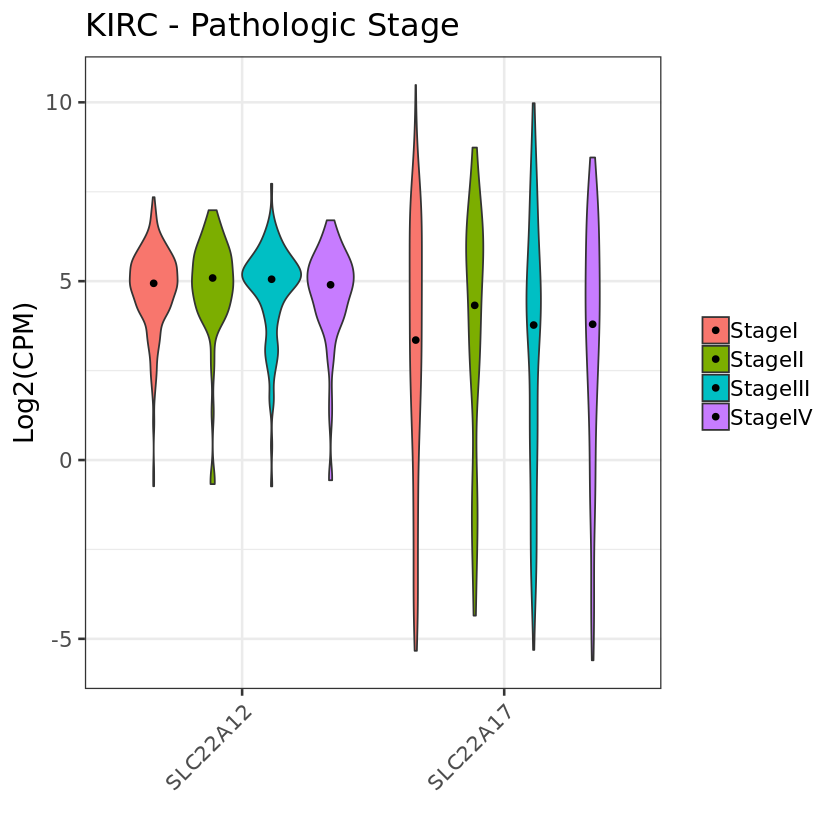

In [14]:
tmp.KIRC_race_age_gen_stage <- which(KIRC_clin_data_tumor_filt_race_age_gen_stage$ajcc_pathologic_stage %in% c("StageI", "StageII",
                                                                                  "StageIII", "StageIV"))
tmp.KIRC_race_age_gen_stage_sig <- rownames(KIRC_race_age_gen_stage_topTable_1v2_SLC22)[KIRC_race_age_gen_stage_topTable_1v2_SLC22$adj.P.Val < 0.1] 
KIRC_race_age_gen_stage_inp <- do.call(rbind.data.frame, lapply(tmp.KIRC_race_age_gen_stage_sig, function(x)  {
                        cbind.data.frame(KIRC_clin_data_tumor_filt_race_age_gen_stage[tmp.KIRC_race_age_gen_stage,],
                         Gene=rep(KIRC_race_age_gen_stage_topTable_1v2_SLC22$Symbol[rownames(KIRC_race_age_gen_stage_topTable_1v2_SLC22) %in% tmp.KIRC_race_age_gen_stage_sig], 
                              nrow(KIRC_clin_data_tumor_filt_race_age_gen_stage[tmp.KIRC_race_age_gen_stage,])),
                         Value=as.numeric(KIRC_voom_race_age_gen_stage$E[rownames(KIRC_voom_race_age_gen_stage) %in% tmp.KIRC_race_age_gen_stage_sig,
                                                                 tmp.KIRC_race_age_gen_stage]))
}))

ggplot(KIRC_race_age_gen_stage_inp, aes(x=Gene, y=Value, fill=ajcc_pathologic_stage)) + geom_violin() +
    theme_bw(base_size=16) + ylab("Log2(CPM)") + labs(title="KIRC - Pathologic Stage") + xlab("") +
    theme(legend.title=element_text(size=0)) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    stat_summary(fun = "median",geom='point', inherit.aes=TRUE, position=position_dodge(0.9)) + scale_color_brewer(palette="Set2")

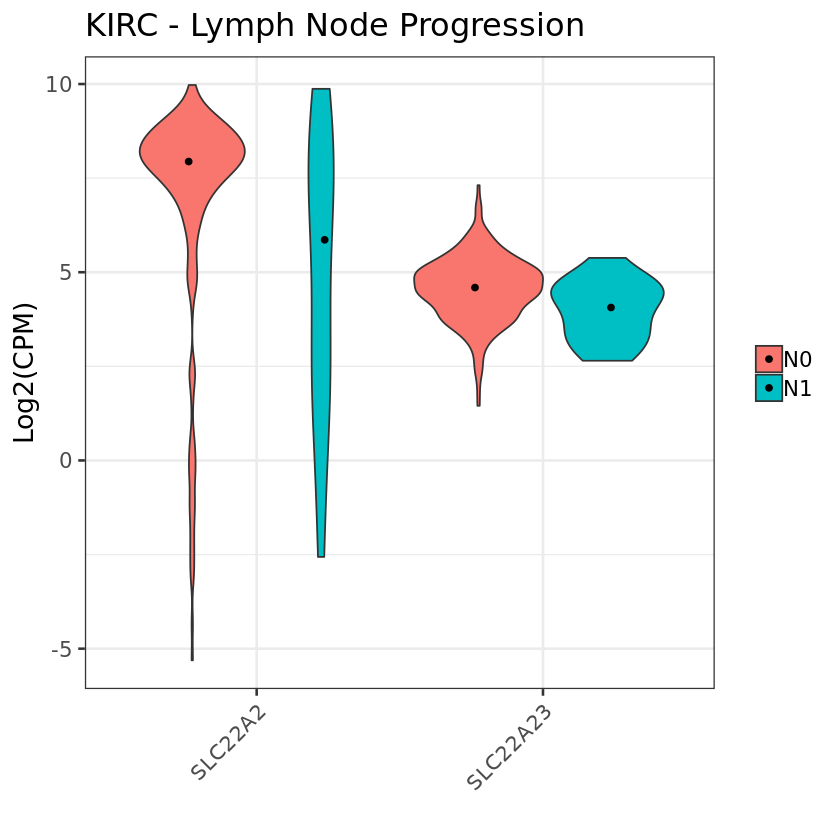

In [15]:
tmp.KIRC_race_age_gen_n <- which(KIRC_clin_data_tumor_filt_race_age_gen_n$ajcc_pathologic_n %in% c("N0", "N1"))
tmp.KIRC_race_age_gen_n_sig <- rownames(KIRC_race_age_gen_n_topTable_SLC22)[KIRC_race_age_gen_n_topTable_SLC22$adj.P.Val < 0.1] 
KIRC_race_age_gen_n_inp <- do.call(rbind.data.frame, lapply(tmp.KIRC_race_age_gen_n_sig, function(x)  {
        cbind.data.frame(KIRC_clin_data_tumor_filt_race_age_gen_n[tmp.KIRC_race_age_gen_n,],
                         Gene=rep(KIRC_race_age_gen_n_topTable_SLC22$Symbol[rownames(KIRC_race_age_gen_n_topTable_SLC22) %in% x], 
                              nrow(KIRC_clin_data_tumor_filt_race_age_gen_n[tmp.KIRC_race_age_gen_n,])),
                         Value=as.numeric(KIRC_voom_race_age_gen_n$E[rownames(KIRC_voom_race_age_gen_n) %in% x, tmp.KIRC_race_age_gen_n]))
    }))
KIRC_race_age_gen_n_inp$Gene <- factor(as.character(KIRC_race_age_gen_n_inp$Gene), 
                               levels=c("SLC22A2","SLC22A23"))                                                            

ggplot(KIRC_race_age_gen_n_inp, aes(x=Gene, y=Value, fill=ajcc_pathologic_n)) + geom_violin() +
    theme_bw(base_size=16) + ylab("Log2(CPM)") + labs(title="KIRC - Lymph Node Progression") + xlab("") +
    theme(legend.title=element_text(size=0)) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    stat_summary(fun = "median",geom='point', inherit.aes=TRUE, position=position_dodge(0.95)) + scale_color_brewer(palette="Set2")

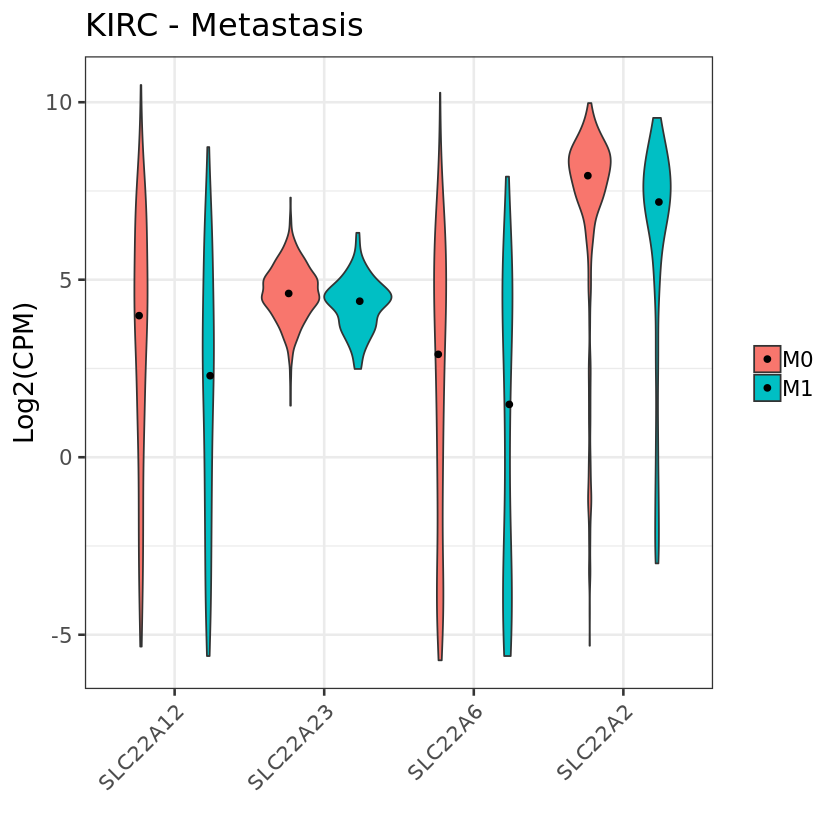

In [16]:
tmp.KIRC_race_age_gen_m <- which(KIRC_clin_data_tumor_filt_race_age_gen_m$ajcc_pathologic_m %in% c("M0", "M1"))
tmp.KIRC_race_age_gen_m_sig <- rownames(KIRC_race_age_gen_m_topTable_SLC22)[KIRC_race_age_gen_m_topTable_SLC22$adj.P.Val < 0.1] 
KIRC_race_age_gen_m_inp <- do.call(rbind.data.frame, lapply(tmp.KIRC_race_age_gen_m_sig, function(x)  {
        cbind.data.frame(KIRC_clin_data_tumor_filt_race_age_gen_m[tmp.KIRC_race_age_gen_m,],
                         Gene=rep(KIRC_race_age_gen_m_topTable_SLC22$Symbol[rownames(KIRC_race_age_gen_m_topTable_SLC22) %in% x], 
                              nrow(KIRC_clin_data_tumor_filt_race_age_gen_m[tmp.KIRC_race_age_gen_m,])),
                         Value=as.numeric(KIRC_voom_race_age_gen_m$E[rownames(KIRC_voom_race_age_gen_m) %in% x, tmp.KIRC_race_age_gen_m]))
    }))
KIRC_race_age_gen_m_inp$Gene <- factor(as.character(KIRC_race_age_gen_m_inp$Gene), 
                               levels=c("SLC22A12","SLC22A23","SLC22A6","SLC22A2"))                                                            
ggplot(KIRC_race_age_gen_m_inp, aes(x=Gene, y=Value, fill=ajcc_pathologic_m)) + geom_violin() +
    theme_bw(base_size=16) + ylab("Log2(CPM)") + labs(title="KIRC - Metastasis") + xlab("") +
    theme(legend.title=element_text(size=0)) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    stat_summary(fun = "median",geom='point', inherit.aes=TRUE, position=position_dodge(0.95)) + scale_color_brewer(palette="Set2")

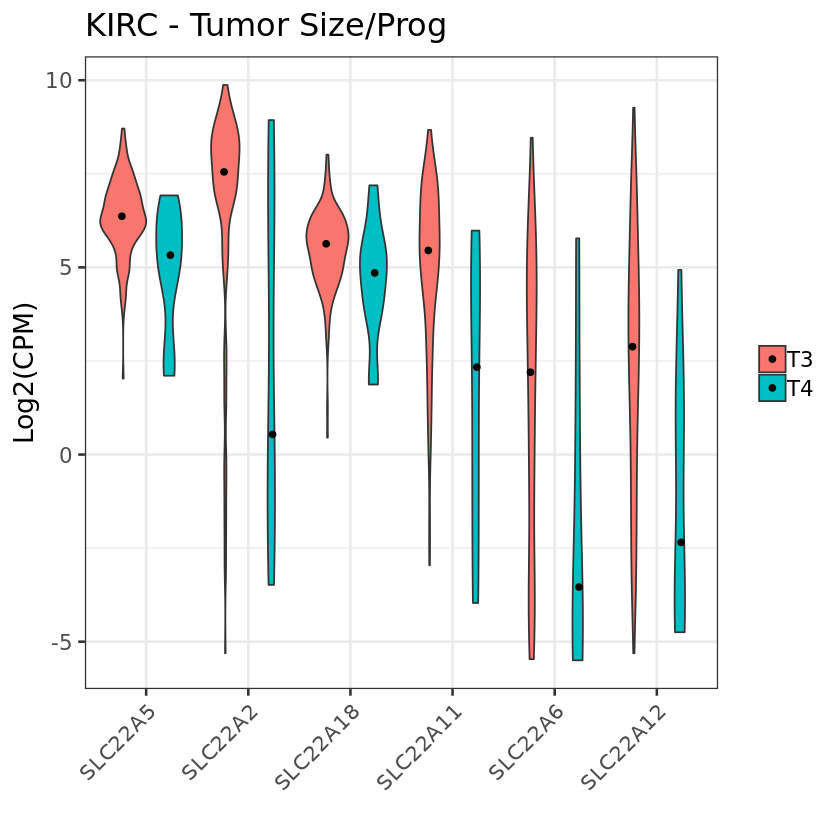

In [17]:
tmp.KIRC_race_age_gen_t_sig <- rownames(KIRC_race_age_gen_t_topTable_3v4_SLC22)[KIRC_race_age_gen_t_topTable_3v4_SLC22$Symbol
    %in% c("SLC22A2","SLC22A5","SLC22A11","SLC22A12","SLC22A18", "SLC22A6")] 
KIRC_race_age_gen_t_inp <- do.call(rbind.data.frame, lapply(tmp.KIRC_race_age_gen_t_sig, function(x)  {
        cbind.data.frame(KIRC_clin_data_tumor_filt_race_age_gen_t,
                         Gene=rep(KIRC_race_age_gen_t_topTable_3v4_SLC22$Symbol[rownames(KIRC_race_age_gen_t_topTable_3v4_SLC22) %in% x], 
                              nrow(KIRC_clin_data_tumor_filt_race_age_gen_t)),
                         Value=as.numeric(KIRC_voom_race_age_gen_t$E[rownames(KIRC_voom_race_age_gen_t) %in% x, ]))
    }))
KIRC_race_age_gen_t_inp$Gene <- factor(as.character(KIRC_race_age_gen_t_inp$Gene), 
                               levels=c("SLC22A5","SLC22A2","SLC22A18","SLC22A11","SLC22A6", "SLC22A12")) 
KIRC_race_age_gen_t_inp$ajcc_pathologic_t <- recode(KIRC_race_age_gen_t_inp$ajcc_pathologic_t, T1a="T1",  T1b="T1",  T2a="T2", 
                                            T2b="T2",  T3a="T3",  T3b="T3")

ggplot(subset(KIRC_race_age_gen_t_inp, ajcc_pathologic_t == "T3" | ajcc_pathologic_t == "T4"),
       aes(x=Gene, y=Value, fill=ajcc_pathologic_t)) + geom_violin() +
    theme_bw(base_size=16) + ylab("Log2(CPM)") + labs(title="KIRC - Tumor Size/Prog") + xlab("") +
    theme(legend.title=element_text(size=0)) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    stat_summary(fun = "median", geom='point', inherit.aes=TRUE, position=position_dodge(0.95)) + scale_color_brewer(palette="Set2")



Warning message:
“Removed 4 rows containing missing values (geom_segment).”
Warning message:
“Removed 4 rows containing missing values (geom_segment).”


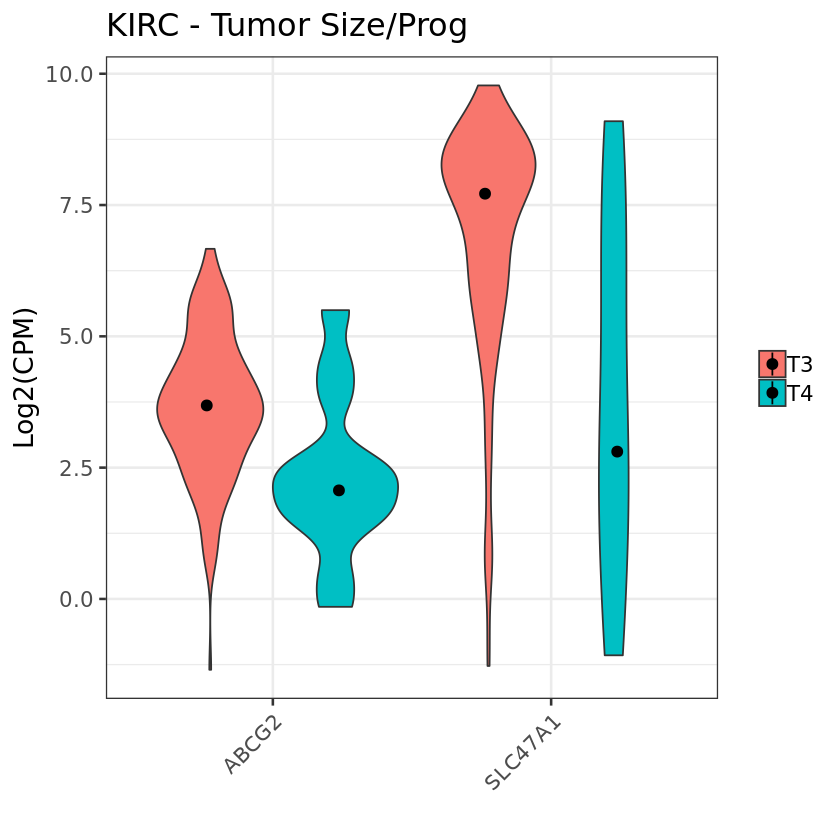

Warning message:
“Removed 4 rows containing missing values (geom_segment).”


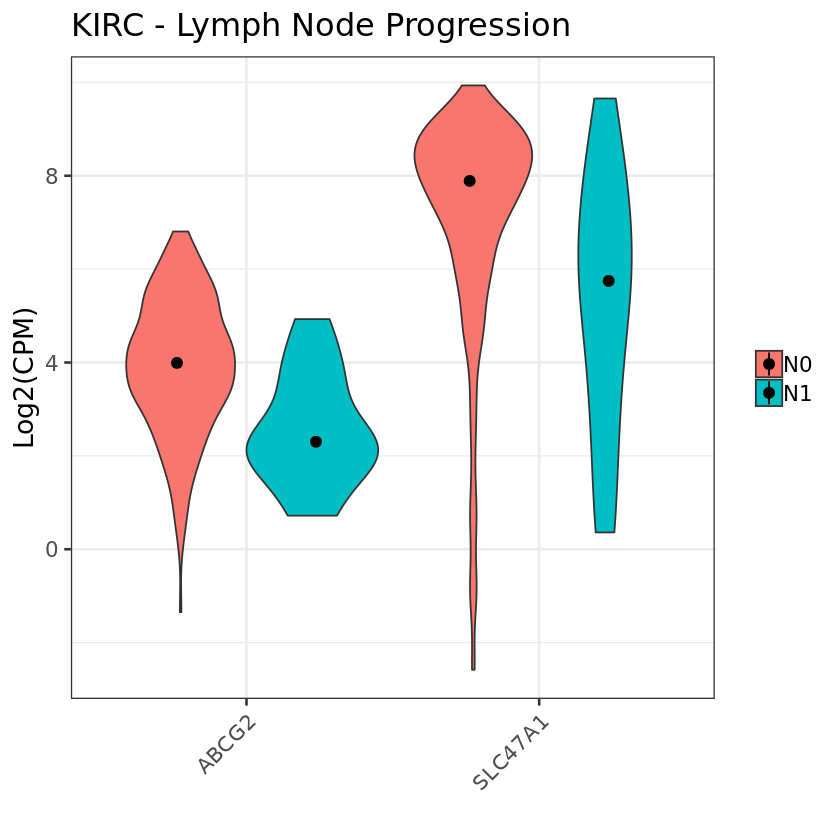

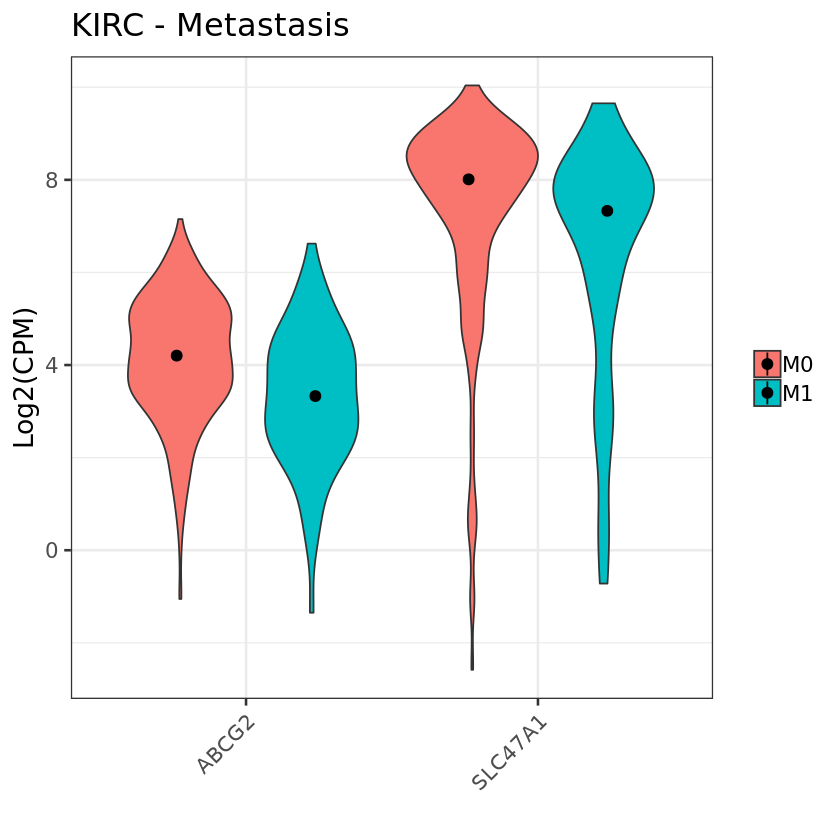

In [18]:
options(repr.plot.width=7, repr.plot.height=7)
tmp.KIRC_race_age_gen_t_sig <- rownames(KIRC_race_age_gen_t_topTable_3v4_ADME)[KIRC_race_age_gen_t_topTable_3v4_ADME$Symbol
    %in% c("ABCG2","SLC47A1")] 
KIRC_race_age_gen_t_inp <- do.call(rbind.data.frame, lapply(tmp.KIRC_race_age_gen_t_sig, function(x)  {
        cbind.data.frame(KIRC_clin_data_tumor_filt_race_age_gen_t,
                         Gene=rep(KIRC_race_age_gen_t_topTable_3v4_ADME$Symbol[rownames(KIRC_race_age_gen_t_topTable_3v4_ADME) %in% x], 
                              nrow(KIRC_clin_data_tumor_filt_race_age_gen_t)),
                         Value=as.numeric(KIRC_voom_race_age_gen_t$E[rownames(KIRC_voom_race_age_gen_t) %in% x, ]))
    }))
KIRC_race_age_gen_t_inp$Gene <- factor(as.character(KIRC_race_age_gen_t_inp$Gene), 
                               levels=c("ABCG2","SLC47A1")) 
KIRC_race_age_gen_t_inp$ajcc_pathologic_t <- recode(KIRC_race_age_gen_t_inp$ajcc_pathologic_t, T1a="T1",  T1b="T1",  T2a="T2", 
                                            T2b="T2",  T3a="T3",  T3b="T3")

ggplot(subset(KIRC_race_age_gen_t_inp, ajcc_pathologic_t == "T3" | ajcc_pathologic_t == "T4"), aes(x=Gene, y=Value, fill=ajcc_pathologic_t)) + geom_violin() +
    theme_bw(base_size=16) + ylab("Log2(CPM)") + labs(title="KIRC - Tumor Size/Prog") + xlab("") +
    theme(legend.title=element_text(size=0)) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    stat_summary(fun = "median",inherit.aes=TRUE, position=position_dodge(0.95)) + scale_color_brewer(palette="Set2")

tmp.KIRC_race_age_gen_n <- which(KIRC_clin_data_tumor_filt_race_age_gen_n$ajcc_pathologic_n %in% c("N0", "N1"))
tmp.KIRC_race_age_gen_n_sig <- rownames(KIRC_race_age_gen_n_topTable_ADME)[KIRC_race_age_gen_n_topTable_ADME$Symbol %in% c("SLC47A1", "ABCG2")] 
KIRC_race_age_gen_n_inp <- do.call(rbind.data.frame, lapply(tmp.KIRC_race_age_gen_n_sig, function(x)  {
        cbind.data.frame(KIRC_clin_data_tumor_filt_race_age_gen_n[tmp.KIRC_race_age_gen_n,],
                         Gene=rep(KIRC_race_age_gen_n_topTable_ADME$Symbol[rownames(KIRC_race_age_gen_n_topTable_ADME) %in% x], 
                              nrow(KIRC_clin_data_tumor_filt_race_age_gen_n[tmp.KIRC_race_age_gen_n,])),
                         Value=as.numeric(KIRC_voom_race_age_gen_n$E[rownames(KIRC_voom_race_age_gen_n) %in% x, tmp.KIRC_race_age_gen_n]))
    }))
KIRC_race_age_gen_n_inp$Gene <- factor(as.character(KIRC_race_age_gen_n_inp$Gene), 
                               levels=c("ABCG2","SLC47A1"))                                                            

ggplot(KIRC_race_age_gen_n_inp, aes(x=Gene, y=Value, fill=ajcc_pathologic_n)) + geom_violin() +
    theme_bw(base_size=16) + ylab("Log2(CPM)") + labs(title="KIRC - Lymph Node Progression") + xlab("") +
    theme(legend.title=element_text(size=0)) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    stat_summary(fun = "median",inherit.aes=TRUE, position=position_dodge(0.95)) + scale_color_brewer(palette="Set2")

tmp.KIRC_race_age_gen_m <- which(KIRC_clin_data_tumor_filt_race_age_gen_m$ajcc_pathologic_m %in% c("M0", "M1"))
tmp.KIRC_race_age_gen_m_sig <- rownames(KIRC_race_age_gen_m_topTable_ADME)[KIRC_race_age_gen_m_topTable_ADME$Symbol %in% c("SLC47A1", "ABCG2")] 
KIRC_race_age_gen_m_inp <- do.call(rbind.data.frame, lapply(tmp.KIRC_race_age_gen_m_sig, function(x)  {
        cbind.data.frame(KIRC_clin_data_tumor_filt_race_age_gen_m[tmp.KIRC_race_age_gen_m,],
                         Gene=rep(KIRC_race_age_gen_m_topTable_ADME$Symbol[rownames(KIRC_race_age_gen_m_topTable_ADME) %in% x], 
                              nrow(KIRC_clin_data_tumor_filt_race_age_gen_m[tmp.KIRC_race_age_gen_m,])),
                         Value=as.numeric(KIRC_voom_race_age_gen_m$E[rownames(KIRC_voom_race_age_gen_m) %in% x, tmp.KIRC_race_age_gen_m]))
    }))

KIRC_race_age_gen_m_inp$Gene <- factor(as.character(KIRC_race_age_gen_m_inp$Gene), 
                               levels=c("ABCG2","SLC47A1"))                                                            

ggplot(KIRC_race_age_gen_m_inp, aes(x=Gene, y=Value, fill=ajcc_pathologic_m)) + geom_violin() +
    theme_bw(base_size=16) + ylab("Log2(CPM)") + labs(title="KIRC - Metastasis") + xlab("") +
    theme(legend.title=element_text(size=0)) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    stat_summary(fun = "median",inherit.aes=TRUE, position=position_dodge(0.95)) + scale_color_brewer(palette="Set2")


In [19]:
KIRC_n_network_inp <- read.csv(file="./data/Nigam_topTable_KIRC_ajcc_path_race_age_gen_n_DE_brinADMEgenes_update_04202022.txt", sep="\t", header=TRUE)
KIRC_t_3v4_network_inp <- read.csv(file="./data/Nigam_topTable_KIRC_ajcc_path_race_age_gen_t_3v4_DE_brinADMEgenes_update_04202022.txt", sep="\t", header=TRUE)
KIRC_m_network_inp <- read.csv(file="./data/Nigam_topTable_KIRC_ajcc_path_race_age_gen_m_DE_brinADMEgenes_update_04202022.txt", sep="\t", header=TRUE)
KIRC_n_network_inp_sig <- KIRC_n_network_inp[KIRC_n_network_inp$adj.P.Val < 0.1,]
KIRC_t_3v4_network_inp_sig <- KIRC_t_3v4_network_inp[KIRC_t_3v4_network_inp$adj.P.Val < 0.1,]
KIRC_m_network_inp_sig <- KIRC_m_network_inp[KIRC_m_network_inp$adj.P.Val < 0.1,]
KIRC_all_network_inp_sig <- rbind.data.frame(KIRC_n_network_inp_sig, KIRC_m_network_inp_sig, KIRC_t_3v4_network_inp_sig)
KIRC_all_network_inp_sig <- KIRC_all_network_inp_sig[!duplicated(KIRC_all_network_inp_sig$Symbol),]
KIRC_n_network_inp_sig_exp <- KIRC_voom_race_age_gen$E[rownames(KIRC_voom_race_age_gen$E) %in% 
                                                       rownames(KIRC_n_network_inp_sig),]
KIRC_t_3v4_network_inp_sig_exp <- KIRC_voom_race_age_gen$E[rownames(KIRC_voom_race_age_gen$E) %in% 
                                                       rownames(KIRC_t_3v4_network_inp_sig),]
KIRC_m_network_inp_sig_exp <- KIRC_voom_race_age_gen$E[rownames(KIRC_voom_race_age_gen$E) %in% 
                                                       rownames(KIRC_m_network_inp_sig),]
KIRC_all_network_inp_sig_exp <- KIRC_voom_race_age_gen$E[rownames(KIRC_voom_race_age_gen$E) %in% 
                                                         rownames(KIRC_all_network_inp_sig),]
rownames(KIRC_m_network_inp_sig_exp) <- KIRC_m_network_inp_sig$Symbol[match(rownames(KIRC_m_network_inp_sig_exp),
                                                                                rownames(KIRC_m_network_inp_sig))]
rownames(KIRC_n_network_inp_sig_exp) <- KIRC_n_network_inp_sig$Symbol[match(rownames(KIRC_n_network_inp_sig_exp),
                                                                                rownames(KIRC_n_network_inp_sig))]
rownames(KIRC_t_3v4_network_inp_sig_exp) <- KIRC_t_3v4_network_inp_sig$Symbol[match(rownames(KIRC_t_3v4_network_inp_sig_exp),
                                                                                rownames(KIRC_t_3v4_network_inp_sig))]
rownames(KIRC_all_network_inp_sig_exp) <- KIRC_all_network_inp_sig$Symbol[match(rownames(KIRC_all_network_inp_sig_exp),
                                                                                rownames(KIRC_all_network_inp_sig))]

KIRC_clin_data_tumor_ML_inp <- KIRC_clin_data_tumor_filt_race_age_gen[,c(2,4,48), drop=FALSE]
KIRC_clin_data_tumor_ML_inp$gender <- as.numeric(KIRC_clin_data_tumor_filt_race_age_gen$gender)-1
KIRC_clin_data_tumor_ML_inp$status <- as.numeric(factor(KIRC_clin_data_tumor_filt_race_age_gen$vital_status))-1
KIRC_clin_data_tumor_ML_inp$days_to_last_follow_up[KIRC_clin_data_tumor_ML_inp$status == 
        1] <- KIRC_clin_data_tumor_filt_race_age_gen$days_to_death[match(KIRC_clin_data_tumor_ML_inp$case_submitter_id[
    KIRC_clin_data_tumor_ML_inp$status == 1], KIRC_clin_data_tumor_filt_race_age_gen$case_submitter_id)]
KIRC_clin_data_tumor_ML_inp$race_white <- ifelse(KIRC_clin_data_tumor_filt_race_age_gen$race == "white", 1, 0)
KIRC_clin_data_tumor_ML_inp$race_black <- ifelse(KIRC_clin_data_tumor_filt_race_age_gen$race == "black", 1, 0)
KIRC_clin_data_tumor_ML_inp$race_asian <- ifelse(KIRC_clin_data_tumor_filt_race_age_gen$race == "asian", 1, 0)
KIRC_clin_data_tumor_ML_inp$race_NR <- ifelse(KIRC_clin_data_tumor_filt_race_age_gen$race == "not_reported", 1, 0)
KIRC_clin_data_tumor_ML_inp$t_T1 <- ifelse(KIRC_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_t %in% c("T1", "T1a", "T1b"), 1, 0)
KIRC_clin_data_tumor_ML_inp$t_T2 <- ifelse(KIRC_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_t %in% c("T2", "T2a", "T2b"), 1, 0)
KIRC_clin_data_tumor_ML_inp$t_T3 <- ifelse(KIRC_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_t %in% c("T3", "T3a", "T3b"), 1, 0)
KIRC_clin_data_tumor_ML_inp$t_T4 <- ifelse(KIRC_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_t %in% c("T4"), 1, 0)
KIRC_clin_data_tumor_ML_inp$t_T1 <- ifelse(KIRC_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_t %in% c("T1", "T1a", "T1b"), 1, 0)
KIRC_clin_data_tumor_ML_inp$m_M0 <- ifelse(KIRC_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_m %in% c("M0"), 1, 0)
KIRC_clin_data_tumor_ML_inp$m_M1 <- ifelse(KIRC_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_m %in% c("M1"), 1, 0)
KIRC_clin_data_tumor_ML_inp$m_MX <- ifelse(KIRC_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_m %in% c("MX"), 1, 0)
KIRC_clin_data_tumor_ML_inp$n_N0 <- ifelse(KIRC_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_n %in% c("N0"), 1, 0)
KIRC_clin_data_tumor_ML_inp$n_N1 <- ifelse(KIRC_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_n %in% c("N1"), 1, 0)
KIRC_clin_data_tumor_ML_inp$n_NX <- ifelse(KIRC_clin_data_tumor_filt_race_age_gen$ajcc_pathologic_n %in% c("NX"), 1, 0)
KIRC_clin_data_sigDE_n_network_inp_exp <- cbind.data.frame(KIRC_clin_data_tumor_ML_inp, 
                                                          as.data.frame(t(KIRC_n_network_inp_sig_exp)))
KIRC_clin_data_sigDE_m_network_inp_exp <- cbind.data.frame(KIRC_clin_data_tumor_ML_inp, 
                                                          as.data.frame(t(KIRC_m_network_inp_sig_exp)))
KIRC_clin_data_sigDE_t_3v4_network_inp_exp <- cbind.data.frame(KIRC_clin_data_tumor_ML_inp, 
                                                          as.data.frame(t(KIRC_t_3v4_network_inp_sig_exp)))
KIRC_clin_data_sigDE_all_network_inp_exp <- cbind.data.frame(KIRC_clin_data_tumor_ML_inp, 
                                                          as.data.frame(t(KIRC_all_network_inp_sig_exp)))


In [866]:
# Write Network Files, NOT RUN
write.csv(KIRC_clin_data_sigDE_n_network_inp_exp, file="Nigam_TCGA_KIRC_n_network_inp_clin_data.csv")
write.csv(KIRC_clin_data_sigDE_m_network_inp_exp, file="Nigam_TCGA_KIRC_m_network_inp_clin_data.csv")
write.csv(KIRC_clin_data_sigDE_t_3v4_network_inp_exp, file="Nigam_TCGA_KIRC_t_3v4_network_inp_clin_data.csv")


## Survival Analysis 

In [20]:
KIRC_surv_inp <- data.frame(status=as.numeric(as.factor(KIRC_clin_data_tumor_filt$vital_status)), 
                            time=as.numeric(KIRC_clin_data_tumor_filt$days_to_last_follow_up),
                            age=KIRC_clin_data_tumor_filt$age_at_index,
                            age2=as.numeric(KIRC_clin_data_tumor_filt$age_at_diagnosis),
                            gender=as.numeric(KIRC_clin_data_tumor_filt$gender))
KIRC_surv_inp$time[which(KIRC_surv_inp$status == 2)] <- as.numeric(KIRC_clin_data_tumor_filt$days_to_death[which(KIRC_surv_inp$status == 2)])
rownames(KIRC_surv_inp) <- KIRC_clin_data_tumor_filt$case_submitter_id
KIRC_surv_inp$Stage1 <- KIRC_surv_inp$Stage2 <- KIRC_surv_inp$Stage3 <- KIRC_surv_inp$Stage4 <- KIRC_surv_inp$M0 <- 
KIRC_surv_inp$M1 <- KIRC_surv_inp$N0 <- KIRC_surv_inp$N1 <- KIRC_surv_inp$T1 <- KIRC_surv_inp$T2 <- 
KIRC_surv_inp$T3 <- KIRC_surv_inp$RaceWhite <- KIRC_surv_inp$RaceBlack <- KIRC_surv_inp$RaceAsian <- 
KIRC_surv_inp$PriMalig <- KIRC_surv_inp$SecMalig <- 0
KIRC_surv_inp$Stage1[which(as.character(KIRC_clin_data_tumor_filt$ajcc_pathologic_stage) == "StageI")] <- 1
KIRC_surv_inp$Stage2[which(as.character(KIRC_clin_data_tumor_filt$ajcc_pathologic_stage) == "StageII")] <- 1
KIRC_surv_inp$Stage3[which(as.character(KIRC_clin_data_tumor_filt$ajcc_pathologic_stage) == "StageIII")] <- 1
KIRC_surv_inp$Stage4[which(as.character(KIRC_clin_data_tumor_filt$ajcc_pathologic_stage) == "StageIV")] <- 1
KIRC_surv_inp$M0[which(as.character(KIRC_clin_data_tumor_filt$ajcc_pathologic_m) == "M0")] <- 1
KIRC_surv_inp$M1[which(as.character(KIRC_clin_data_tumor_filt$ajcc_pathologic_m) == "M1")] <- 1
KIRC_surv_inp$N0[which(as.character(KIRC_clin_data_tumor_filt$ajcc_pathologic_n) == "N0")] <- 1
KIRC_surv_inp$N1[which(as.character(KIRC_clin_data_tumor_filt$ajcc_pathologic_n) == "N1")] <- 1
KIRC_surv_inp$T1[which(as.character(KIRC_clin_data_tumor_filt$ajcc_pathologic_t) %in% c("T1", "T1a", "T1b"))] <- 1
KIRC_surv_inp$T2[which(as.character(KIRC_clin_data_tumor_filt$ajcc_pathologic_t) %in% c("T2", "T2a", "T2b"))] <- 1
KIRC_surv_inp$T3[which(as.character(KIRC_clin_data_tumor_filt$ajcc_pathologic_t) %in% c("T3", "T3a", "T3b", "T3c"))] <- 1
KIRC_surv_inp$RaceWhite[which(as.character(KIRC_clin_data_tumor_filt$race) == "white")] <- 1
KIRC_surv_inp$RaceBlack[which(as.character(KIRC_clin_data_tumor_filt$race) == "black or african american")] <- 1
KIRC_surv_inp$RaceAsian[which(as.character(KIRC_clin_data_tumor_filt$race) == "asian")] <- 1
KIRC_surv_inp$Race <- factor(gsub(" or african american", "", as.character(KIRC_clin_data_tumor_filt$race)))
KIRC_surv_inp$TreatmentType <- factor(gsub(", NOS$", "", KIRC_clin_data_tumor_filt$treatment_type))
KIRC_surv_inp$PriMalig[which(as.character(KIRC_clin_data_tumor_filt$prior_malignancy) == "yes")] <- 1
KIRC_surv_inp$Stage <- factor(as.character(KIRC_clin_data_tumor_filt$ajcc_pathologic_stage))
KIRC_surv_inp$M <- factor(as.character(KIRC_clin_data_tumor_filt$ajcc_pathologic_m))
KIRC_surv_inp$N <- factor(as.character(KIRC_clin_data_tumor_filt$ajcc_pathologic_n))
KIRC_surv_inp$T <- factor(gsub("T3a|T3b|T3c", "T3", gsub("T2a|T2b", "T2", 
                                        gsub("T1a|T1b", "T1", as.character(KIRC_clin_data_tumor_filt$ajcc_pathologic_t)))))


Warning message in data.frame(status = as.numeric(as.factor(KIRC_clin_data_tumor_filt$vital_status)), :
“NAs introduced by coercion”
Warning message in data.frame(status = as.numeric(as.factor(KIRC_clin_data_tumor_filt$vital_status)), :
“NAs introduced by coercion”


In [21]:
KIRC_data_tumor_SLC22 <- KIRC_data_tumor_filt_orig[match(all_SLC22_nodes_KIRC.df.filt$EGID,
                                                    rownames(KIRC_data_tumor_filt_orig)),]

KIRC_invNormTrans <- apply(KIRC_data_tumor_SLC22, 1, function(x) {
    round(qnorm((rank(x, na.last="keep")-0.5)/sum(!is.na(x))), digit=5)})
KIRC_invNormTrans.df <- as.data.frame(t(KIRC_invNormTrans)) ##(rows are genes, cols are samples)
dim(KIRC_invNormTrans.df)
KIRC_invNormTrans.df <- KIRC_invNormTrans.df[,match(rownames(KIRC_surv_inp),
                                    unlist(lapply(strsplit(colnames(KIRC_invNormTrans.df), split="\\."), function(x) {
                                            paste(x[[1]], x[[2]], x[[3]], sep="-")
                                    })))]

[1]  17 530

In [22]:
# Cox Proportions Hazard Model with SLC22 gene expression and no factors
KIRC_coxph.out_nofac <- KIRC_coxph.mod_nofac <- list()
for (i in 1:nrow(KIRC_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRC_surv_inp, gene= as.numeric(KIRC_invNormTrans.df[i,]))
    tmp.surv <- summary(coxph(Surv(time, status) ~ gene + age2 + gender, data=inv.df))
    tmp.mod <- coxph(Surv(time, status) ~ gene + age2 + gender, data=inv.df)
    KIRC_coxph.out_nofac[[i]] <- tmp.surv
    KIRC_coxph.mod_nofac[[i]] <- tmp.mod
}
KIRC_coxph.coef.pval_nofac.df <- do.call(rbind.data.frame, lapply(KIRC_coxph.out_nofac, function(x) x$coefficients[1,c(1,2,5)]))
rownames(KIRC_coxph.coef.pval_nofac.df) <- EG2SYM$symbol[match(rownames(KIRC_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRC_coxph.coef.pval_nofac.df) <- c("coef",  "hazard_ratio","pval")
names(KIRC_coxph.mod_nofac) <- rownames(KIRC_coxph.coef.pval_nofac.df)
                                                                       
if(sum (KIRC_coxph.coef.pval_nofac.df$pval < 0.0005) > 0) {
w_KIRC_cox_nofac <- which(KIRC_coxph.coef.pval_nofac.df$pval < 0.0005)
show(KIRC_coxph.coef.pval_nofac.df[w_KIRC_cox_nofac,])
                                                                  
KIRC_cox_nofac_diag <- lapply(KIRC_coxph.mod_nofac[w_KIRC_cox_nofac], function(x) cox.zph(x))
KIRC_cox_nofac_diag_glob_p <- unlist(lapply(KIRC_cox_nofac_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRC_cox_nofac_diag_glob_p)
w_KIRC_cox_nofac_diag <- which(KIRC_cox_nofac_diag_glob_p < 0.05)
KIRC_cox_nofac_diag[w_KIRC_cox_nofac_diag]
}

               coef hazard_ratio         pval
SLC22A2  -0.4150136    0.6603313 2.048407e-07
SLC22A4  -0.3207765    0.7255854 1.074638e-05
SLC22A5  -0.3048616    0.7372254 2.286215e-04
SLC22A6  -0.4033223    0.6680968 2.984396e-07
SLC22A8  -0.4570459    0.6331512 1.175476e-07
SLC22A7  -0.3025207    0.7389532 2.393256e-04
SLC22A11 -0.3614958    0.6966335 1.955926e-06
SLC22A12 -0.3662322    0.6933418 4.758088e-06
SLC22A24 -0.4240552    0.6543878 4.890685e-07
  SLC22A2   SLC22A4   SLC22A5   SLC22A6   SLC22A8   SLC22A7  SLC22A11  SLC22A12 
0.9982852 0.9988658 0.9998067 0.9966358 0.9861287 0.9997431 0.9960984 0.9963433 
 SLC22A24 
0.9963095 


named list()

In [23]:
# Cox Proportions Hazard Model with SLC22 gene expression and base factors (age, gender)
KIRC_coxph.out_base <- KIRC_coxph.mod_base <- list()
for (i in 1:nrow(KIRC_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRC_surv_inp, gene= as.numeric(KIRC_invNormTrans.df[i,]))
    tmp.surv <- summary(coxph(Surv(time, status) ~ gene + Stage1 + Stage2 + Stage3 + Stage4 + age2 + gender, data=inv.df))
    tmp.mod <- coxph(Surv(time, status) ~ gene + Stage1 + Stage2 + Stage3 + Stage4 + age2 + gender, data=inv.df)
    KIRC_coxph.out_base[[i]] <- tmp.surv
    KIRC_coxph.mod_base[[i]] <- tmp.mod
}
KIRC_coxph.coef.pval_base.df <- do.call(rbind.data.frame, lapply(KIRC_coxph.out_base, function(x) x$coefficients[1,c(1,2,5)]))
rownames(KIRC_coxph.coef.pval_base.df) <- EG2SYM$symbol[match(rownames(KIRC_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRC_coxph.coef.pval_base.df) <- c("coef",  "hazard_ratio","pval")
names(KIRC_coxph.mod_base) <- rownames(KIRC_coxph.coef.pval_base.df)
                                                                       
if(sum (KIRC_coxph.coef.pval_base.df$pval < 0.0005) > 0) {
w_KIRC_cox_base <- which(KIRC_coxph.coef.pval_base.df$pval < 0.0005)
show(KIRC_coxph.coef.pval_base.df[w_KIRC_cox_base,])
                                                                  
KIRC_cox_base_diag <- lapply(KIRC_coxph.mod_base[w_KIRC_cox_base], function(x) cox.zph(x))
KIRC_cox_base_diag_glob_p <- unlist(lapply(KIRC_cox_base_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRC_cox_base_diag_glob_p)
w_KIRC_cox_base_diag <- which(KIRC_cox_base_diag_glob_p < 0.05)
}
                                                                 


               coef hazard_ratio         pval
SLC22A2  -0.3749476    0.6873253 6.454933e-06
SLC22A4  -0.3144623    0.7301814 7.065777e-05
SLC22A5  -0.3536483    0.7021219 2.040696e-05
SLC22A6  -0.3555971    0.7007549 6.772765e-06
SLC22A8  -0.3776505    0.6854700 2.298325e-05
SLC22A11 -0.3324689    0.7171510 1.124919e-04
SLC22A24 -0.3602028    0.6975349 1.921637e-05
   SLC22A2    SLC22A4    SLC22A5    SLC22A6    SLC22A8   SLC22A11   SLC22A24 
0.04797896 0.02703694 0.03477509 0.03627331 0.02337107 0.02978957 0.04230851 


In [24]:
# Cox Proportions Hazard Model with SLC22 gene expression, race, and base factors (age, gender)
KIRC_coxph.out_base_race <- KIRC_coxph.mod_base_race <- list()
for (i in 1:nrow(KIRC_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRC_surv_inp, gene= as.numeric(KIRC_invNormTrans.df[i,]))
    tmp.surv <- summary(coxph(Surv(time, status) ~ gene + Stage1 + Stage2 + Stage3 + Stage4 + 
                              age2 + gender + Race, data=inv.df))
    tmp.mod <- coxph(Surv(time, status) ~ gene + Stage1 + Stage2 + Stage3 + Stage4 + 
                              age2 + gender + Race, data=inv.df)
    KIRC_coxph.out_base_race[[i]] <- tmp.surv
    KIRC_coxph.mod_base_race[[i]] <- tmp.mod
}
KIRC_coxph.coef.pval.base_race.df <- do.call(rbind.data.frame, lapply(KIRC_coxph.out_base_race, function(x) x$coefficients[1,c(1,2,5)]))
rownames(KIRC_coxph.coef.pval.base_race.df) <- EG2SYM$symbol[match(rownames(KIRC_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRC_coxph.coef.pval.base_race.df) <- c("coef", "hazard_ratio", "pval")

names(KIRC_coxph.mod_base_race) <- rownames(KIRC_coxph.coef.pval.base_race.df)
                                                                       
if(sum(KIRC_coxph.coef.pval.base_race.df$pval < 0.0005) > 0) {
w_KIRC_cox_base_race <- which(KIRC_coxph.coef.pval.base_race.df$pval < 0.0005)
show(KIRC_coxph.coef.pval.base_race.df[w_KIRC_cox_base_race,])
                                                                  
KIRC_cox_base_race_diag <- lapply(KIRC_coxph.mod_base_race[w_KIRC_cox_base_race], function(x) cox.zph(x))
KIRC_cox_base_race_diag_glob_p <- unlist(lapply(KIRC_cox_base_race_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRC_cox_base_race_diag_glob_p)
w_KIRC_cox_base_race_diag <- which(KIRC_cox_base_race_diag_glob_p < 0.05)
}


               coef hazard_ratio         pval
SLC22A2  -0.3842591    0.6809550 4.546503e-06
SLC22A4  -0.3144528    0.7301884 7.405446e-05
SLC22A5  -0.3522182    0.7031267 2.275393e-05
SLC22A6  -0.3595316    0.6980032 5.931575e-06
SLC22A8  -0.3804458    0.6835566 2.230289e-05
SLC22A11 -0.3351562    0.7152263 1.011678e-04
SLC22A24 -0.3645874    0.6944831 1.767453e-05
   SLC22A2    SLC22A4    SLC22A5    SLC22A6    SLC22A8   SLC22A11   SLC22A24 
0.03493630 0.01580675 0.02099222 0.02260662 0.01445210 0.01970169 0.02436344 


In [25]:
# Cox Proportions Hazard Model with SLC22 gene expression, primary malignancy, and base factors (age, gender)
KIRC_coxph.out_priMalig <- KIRC_coxph.mod_priMalig <- list()
for (i in 1:nrow(KIRC_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRC_surv_inp, gene= as.numeric(KIRC_invNormTrans.df[i,]))
    tmp.surv <- summary(coxph(Surv(time, status) ~ gene + age2 + gender + PriMalig, data=inv.df))
    tmp.mod <- coxph(Surv(time, status) ~ gene + age2 + gender + PriMalig, data=inv.df)
    KIRC_coxph.out_priMalig[[i]] <- tmp.surv
    KIRC_coxph.mod_priMalig[[i]] <- tmp.mod
}
KIRC_coxph.coef.pval_priMalig.df <- do.call(rbind.data.frame, lapply(KIRC_coxph.out_priMalig, function(x) x$coefficients[1,c(1,2,5)]))
rownames(KIRC_coxph.coef.pval_priMalig.df) <- EG2SYM$symbol[match(rownames(KIRC_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRC_coxph.coef.pval_priMalig.df) <- c("coef", "hazard_ratio", "pval")

names(KIRC_coxph.mod_priMalig) <- rownames(KIRC_coxph.coef.pval_priMalig.df)
                                                                       
if(sum (KIRC_coxph.coef.pval_priMalig.df$pval < 0.0005) > 0) {
w_KIRC_cox_priMalig <- which(KIRC_coxph.coef.pval_priMalig.df$pval < 0.0005)
show(KIRC_coxph.coef.pval_priMalig.df[w_KIRC_cox_priMalig,])
                                                                  
KIRC_cox_priMalig_diag <- lapply(KIRC_coxph.mod_priMalig[w_KIRC_cox_priMalig], function(x) cox.zph(x))
KIRC_cox_priMalig_diag_glob_p <- unlist(lapply(KIRC_cox_priMalig_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRC_cox_priMalig_diag_glob_p)
w_KIRC_cox_priMalig_diag <- which(KIRC_cox_priMalig_diag_glob_p < 0.05)
}


               coef hazard_ratio         pval
SLC22A2  -0.4200965    0.6569834 1.559387e-07
SLC22A4  -0.3172405    0.7281556 1.237656e-05
SLC22A5  -0.3050175    0.7371105 2.205160e-04
SLC22A6  -0.4068660    0.6657334 2.105379e-07
SLC22A8  -0.4589624    0.6319390 1.096372e-07
SLC22A7  -0.3126235    0.7315253 1.673855e-04
SLC22A11 -0.3626351    0.6958403 1.946226e-06
SLC22A12 -0.3674257    0.6925148 4.786133e-06
SLC22A24 -0.4244176    0.6541506 5.361612e-07
  SLC22A2   SLC22A4   SLC22A5   SLC22A6   SLC22A8   SLC22A7  SLC22A11  SLC22A12 
0.9504556 0.8561675 0.8822014 0.8975056 0.9254075 0.9263661 0.8543113 0.8566806 
 SLC22A24 
0.8832145 


In [26]:
# Cox Proportions Hazard Model with SLC22 gene expression, primary malignancy, race, and base factors (age, gender)
KIRC_coxph.out_priMalig_race <- KIRC_coxph.mod_priMalig_race <- list()
for (i in 1:nrow(KIRC_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRC_surv_inp, gene= as.numeric(KIRC_invNormTrans.df[i,]))
    tmp.surv <- summary(coxph(Surv(time, status) ~ gene + age2 + gender + PriMalig + Race, data=inv.df))
    tmp.mod <- coxph(Surv(time, status) ~ gene + age2 + gender + PriMalig + Race, data=inv.df)
    KIRC_coxph.out_priMalig_race[[i]] <- tmp.surv
    KIRC_coxph.mod_priMalig_race[[i]] <- tmp.mod
}
KIRC_coxph.coef.pval_priMalig_race.df <- do.call(rbind.data.frame, lapply(KIRC_coxph.out_priMalig_race, function(x) x$coefficients[1,c(1,2,5)]))
rownames(KIRC_coxph.coef.pval_priMalig_race.df) <- EG2SYM$symbol[match(rownames(KIRC_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRC_coxph.coef.pval_priMalig_race.df) <- c("coef", "hazard_ratio", "pval")

names(KIRC_coxph.mod_priMalig_race) <- rownames(KIRC_coxph.coef.pval_priMalig_race.df)
                                                                       
if(sum (KIRC_coxph.coef.pval_priMalig_race.df$pval < 0.0005) > 0) {
w_KIRC_cox_priMalig_race <- which(KIRC_coxph.coef.pval_priMalig_race.df$pval < 0.0005)
show(KIRC_coxph.coef.pval_priMalig_race.df[w_KIRC_cox_priMalig_race,])
                                                                  
KIRC_cox_priMalig_race_diag <- lapply(KIRC_coxph.mod_priMalig_race[w_KIRC_cox_priMalig_race], function(x) cox.zph(x))
KIRC_cox_priMalig_race_diag_glob_p <- unlist(lapply(KIRC_cox_priMalig_race_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRC_cox_priMalig_race_diag_glob_p)
w_KIRC_cox_priMalig_race_diag <- which(KIRC_cox_priMalig_race_diag_glob_p < 0.05)
}

               coef hazard_ratio         pval
SLC22A2  -0.4347020    0.6474576 8.321001e-08
SLC22A4  -0.3235003    0.7236117 9.844288e-06
SLC22A5  -0.3064938    0.7360231 2.256631e-04
SLC22A6  -0.4116883    0.6625307 1.642685e-07
SLC22A8  -0.4643171    0.6285642 9.317754e-08
SLC22A7  -0.3193139    0.7266474 1.349395e-04
SLC22A11 -0.3660362    0.6934777 1.577114e-06
SLC22A12 -0.3761536    0.6864969 3.450719e-06
SLC22A24 -0.4327981    0.6486914 4.439874e-07
  SLC22A2   SLC22A4   SLC22A5   SLC22A6   SLC22A8   SLC22A7  SLC22A11  SLC22A12 
0.4091819 0.2232396 0.2541272 0.2754864 0.2789202 0.3421519 0.2974953 0.3052682 
 SLC22A24 
0.2718227 


In [27]:
# Cox Proportions Hazard Model with SLC22 gene expression, treatment type, and base factors (age, gender)
KIRC_coxph.out_treatment <- KIRC_coxph.mod_treatment <- list()
for (i in 1:nrow(KIRC_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRC_surv_inp, gene= as.numeric(KIRC_invNormTrans.df[i,]))
    tmp.surv <- summary(coxph(Surv(time, status) ~ gene + age2 + gender + TreatmentType, data=inv.df))
    tmp.mod <- coxph(Surv(time, status) ~ gene + age2 + gender + TreatmentType, data=inv.df)
    KIRC_coxph.out_treatment[[i]] <- tmp.surv
    KIRC_coxph.mod_treatment[[i]] <- tmp.mod
}
KIRC_coxph.coef.pval_treatment.df <- do.call(rbind.data.frame, lapply(KIRC_coxph.out_treatment, function(x) x$coefficients[1,c(1,2,5)]))
rownames(KIRC_coxph.coef.pval_treatment.df) <- EG2SYM$symbol[match(rownames(KIRC_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRC_coxph.coef.pval_treatment.df) <- c("coef", "hazard_ratio", "pval")
names(KIRC_coxph.mod_treatment) <- rownames(KIRC_coxph.coef.pval_treatment.df)
                                                                       
if(sum (KIRC_coxph.coef.pval_treatment.df$pval < 0.0005) > 0) {
w_KIRC_cox_treatment <- which(KIRC_coxph.coef.pval_treatment.df$pval < 0.0005)
show(KIRC_coxph.coef.pval_treatment.df[w_KIRC_cox_treatment,])
                                                                  
KIRC_cox_treatment_diag <- lapply(KIRC_coxph.mod_treatment[w_KIRC_cox_treatment], function(x) cox.zph(x))
KIRC_cox_treatment_diag_glob_p <- unlist(lapply(KIRC_cox_treatment_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRC_cox_treatment_diag_glob_p)
w_KIRC_cox_treatment_diag <- which(KIRC_cox_treatment_diag_glob_p < 0.05)
}


               coef hazard_ratio         pval
SLC22A2  -0.4148588    0.6604335 1.774082e-07
SLC22A4  -0.3234867    0.7236216 8.527372e-06
SLC22A5  -0.3130116    0.7312414 1.616306e-04
SLC22A6  -0.4077918    0.6651174 1.996949e-07
SLC22A8  -0.4600083    0.6312784 9.241736e-08
SLC22A7  -0.3072410    0.7354733 1.915547e-04
SLC22A11 -0.3777937    0.6853719 8.143931e-07
SLC22A12 -0.3782852    0.6850351 2.483411e-06
SLC22A24 -0.4314362    0.6495755 3.613937e-07
  SLC22A2   SLC22A4   SLC22A5   SLC22A6   SLC22A8   SLC22A7  SLC22A11  SLC22A12 
0.9632230 0.9875139 0.9943882 0.9767519 0.9790414 0.9925433 0.9823235 0.9883575 
 SLC22A24 
0.9933501 


In [28]:
# Cox Proportions Hazard Model with SLC22 gene expression, treatment type, race, and base factors (age, gender)
KIRC_coxph.out_treatment_race <- KIRC_coxph.mod_treatment_race <-list()
for (i in 1:nrow(KIRC_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRC_surv_inp, gene= as.numeric(KIRC_invNormTrans.df[i,]))
    tmp.surv <- summary(coxph(Surv(time, status) ~ gene + age2 + gender + TreatmentType + Race, data=inv.df))
    tmp.mod <- coxph(Surv(time, status) ~ gene + age2 + gender + TreatmentType + Race, data=inv.df)
    KIRC_coxph.out_treatment_race[[i]] <- tmp.surv
    KIRC_coxph.mod_treatment_race[[i]] <- tmp.mod
}
KIRC_coxph.coef.pval_treatment_race.df <- do.call(rbind.data.frame, lapply(KIRC_coxph.out_treatment_race, function(x) x$coefficients[1,c(1,2,5)]))
rownames(KIRC_coxph.coef.pval_treatment_race.df) <- EG2SYM$symbol[match(rownames(KIRC_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRC_coxph.coef.pval_treatment_race.df) <- c("coef", "hazard_ratio", "pval")

names(KIRC_coxph.mod_treatment_race) <- rownames(KIRC_coxph.coef.pval_treatment_race.df)
                                                                       
if(sum (KIRC_coxph.coef.pval_treatment_race.df$pval < 0.0005) > 0) {
w_KIRC_cox_treatment_race <- which(KIRC_coxph.coef.pval_treatment_race.df$pval < 0.0005)
show(KIRC_coxph.coef.pval_treatment_race.df[w_KIRC_cox_treatment_race,])
                                                                  
KIRC_cox_treatment_race_diag <- lapply(KIRC_coxph.mod_treatment_race[w_KIRC_cox_treatment_race], function(x) cox.zph(x))
KIRC_cox_treatment_race_diag_glob_p <- unlist(lapply(KIRC_cox_treatment_race_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRC_cox_treatment_race_diag_glob_p)
w_KIRC_cox_treatment_race_diag <- which(KIRC_cox_treatment_race_diag_glob_p < 0.05)
}


               coef hazard_ratio         pval
SLC22A2  -0.4326632    0.6487790 8.179318e-08
SLC22A4  -0.3321833    0.7173558 5.862309e-06
SLC22A5  -0.3163481    0.7288057 1.570335e-04
SLC22A6  -0.4133270    0.6614460 1.479383e-07
SLC22A8  -0.4645815    0.6283981 7.864771e-08
SLC22A7  -0.3170371    0.7283037 1.413464e-04
SLC22A11 -0.3835118    0.6814640 6.018221e-07
SLC22A12 -0.3887030    0.6779356 1.679728e-06
SLC22A24 -0.4418029    0.6428763 2.807738e-07
  SLC22A2   SLC22A4   SLC22A5   SLC22A6   SLC22A8   SLC22A7  SLC22A11  SLC22A12 
0.4619523 0.3287537 0.3621531 0.3658979 0.3568749 0.4329574 0.4311254 0.4426166 
 SLC22A24 
0.3806904 


In [29]:
# Cox Proportions Hazard Model with SLC22 gene expression, pathologic stage, and base factors (age, gender)
KIRC_coxph.out_stage <- KIRC_coxph.mod_stage <- list()
for (i in 1:nrow(KIRC_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRC_surv_inp, gene= as.numeric(KIRC_invNormTrans.df[i,]))
    tmp.surv <- summary(coxph(Surv(time, status) ~ gene + Stage+ age2 + gender, data=inv.df))
    tmp.mod <- coxph(Surv(time, status) ~ gene + Stage+ age2 + gender, data=inv.df)
    KIRC_coxph.out_stage[[i]] <- tmp.surv
    KIRC_coxph.mod_stage[[i]] <- tmp.mod
}
KIRC_coxph.coef.pval_stage.df <- do.call(rbind.data.frame, lapply(KIRC_coxph.out_stage, function(x) x$coefficients[1,c(1,2,5)]))
rownames(KIRC_coxph.coef.pval_stage.df) <- EG2SYM$symbol[match(rownames(KIRC_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRC_coxph.coef.pval_stage.df) <- c("coef", "hazard_ratio", "pval")
names(KIRC_coxph.mod_stage) <- rownames(KIRC_coxph.coef.pval_stage.df)
                                                                       
if(sum (KIRC_coxph.coef.pval_stage.df$pval < 0.0005) > 0) {
w_KIRC_cox_stage <- which(KIRC_coxph.coef.pval_stage.df$pval < 0.0005)
show(KIRC_coxph.coef.pval_stage.df[w_KIRC_cox_stage,])
                                                                  
KIRC_cox_stage_diag <- lapply(KIRC_coxph.mod_stage[w_KIRC_cox_stage], function(x) cox.zph(x))
KIRC_cox_stage_diag_glob_p <- unlist(lapply(KIRC_cox_stage_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRC_cox_stage_diag_glob_p)
w_KIRC_cox_stage_diag <- which(KIRC_cox_stage_diag_glob_p < 0.05)
}                                                                  


               coef hazard_ratio         pval
SLC22A2  -0.3749476    0.6873253 6.454933e-06
SLC22A4  -0.3144623    0.7301814 7.065777e-05
SLC22A5  -0.3536483    0.7021219 2.040696e-05
SLC22A6  -0.3555971    0.7007549 6.772765e-06
SLC22A8  -0.3776505    0.6854700 2.298325e-05
SLC22A11 -0.3324689    0.7171510 1.124919e-04
SLC22A24 -0.3602028    0.6975349 1.921637e-05
   SLC22A2    SLC22A4    SLC22A5    SLC22A6    SLC22A8   SLC22A11   SLC22A24 
0.04797896 0.02703694 0.03477509 0.03627331 0.02337107 0.02978957 0.04230851 


In [30]:
# Cox Proportions Hazard Model with SLC22 gene expression, pathologic stage, race, and base factors (age, gender)
KIRC_coxph.out_stage_race <- KIRC_coxph.mod_stage_race <- list()
for (i in 1:nrow(KIRC_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRC_surv_inp, gene= as.numeric(KIRC_invNormTrans.df[i,]))
    tmp.surv <- summary(coxph(Surv(time, status) ~ gene + Stage + age2 + gender + Race, data=inv.df))
    tmp.mod <- coxph(Surv(time, status) ~ gene + Stage + age2 + gender + Race, data=inv.df)
    KIRC_coxph.out_stage_race[[i]] <- tmp.surv
    KIRC_coxph.mod_stage_race[[i]] <- tmp.mod
}
KIRC_coxph.coef.pval_stage_race.df <- do.call(rbind.data.frame, lapply(KIRC_coxph.out_stage_race, function(x) x$coefficients[1,c(1,2,5)]))
rownames(KIRC_coxph.coef.pval_stage_race.df) <- EG2SYM$symbol[match(rownames(KIRC_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRC_coxph.coef.pval_stage_race.df) <- c("coef", "hazard_ratio", "pval")
names(KIRC_coxph.mod_stage_race) <- rownames(KIRC_coxph.coef.pval_stage_race.df)
                                                                       
if(sum (KIRC_coxph.coef.pval_stage_race.df$pval < 0.0005) > 0) {
w_KIRC_cox_stage_race <- which(KIRC_coxph.coef.pval_stage_race.df$pval < 0.0005)
show(KIRC_coxph.coef.pval_stage_race.df[w_KIRC_cox_stage_race,])
                                                                  
KIRC_cox_stage_race_diag <- lapply(KIRC_coxph.mod_stage_race[w_KIRC_cox_stage_race], function(x) cox.zph(x))
KIRC_cox_stage_race_diag_glob_p <- unlist(lapply(KIRC_cox_stage_race_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRC_cox_stage_race_diag_glob_p)
w_KIRC_cox_stage_race_diag <- which(KIRC_cox_stage_race_diag_glob_p < 0.05)
}
     

               coef hazard_ratio         pval
SLC22A2  -0.3842591    0.6809550 4.546503e-06
SLC22A4  -0.3144528    0.7301884 7.405446e-05
SLC22A5  -0.3522182    0.7031267 2.275393e-05
SLC22A6  -0.3595316    0.6980032 5.931575e-06
SLC22A8  -0.3804458    0.6835566 2.230289e-05
SLC22A11 -0.3351562    0.7152263 1.011678e-04
SLC22A24 -0.3645874    0.6944831 1.767453e-05
   SLC22A2    SLC22A4    SLC22A5    SLC22A6    SLC22A8   SLC22A11   SLC22A24 
0.03493630 0.01580675 0.02099222 0.02260662 0.01445210 0.01970169 0.02436344 


In [31]:
# Cox Proportions Hazard Model with SLC22 gene expression, presence of metastasis, and base factors (age, gender)
KIRC_coxph.out_m <- KIRC_coxph.mod_m <- list()

for (i in 1:nrow(KIRC_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRC_surv_inp, gene= as.numeric(KIRC_invNormTrans.df[i,]))
    tmp.surv <- summary(coxph(Surv(time, status) ~ gene + age + gender + M0 + M1, 
                              data=inv.df))
     tmp.mod <- coxph(Surv(time, status) ~ gene + age + gender + M0 + M1, 
                              data=inv.df)
    KIRC_coxph.out_m[[i]] <- tmp.surv
    KIRC_coxph.mod_m[[i]] <- tmp.mod
}
KIRC_coxph.coef.pval_m.df <- do.call(rbind.data.frame, lapply(KIRC_coxph.out_m, function(x) x$coefficients[1,c(1,2,5)]))
rownames(KIRC_coxph.coef.pval_m.df) <- EG2SYM$symbol[match(rownames(KIRC_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRC_coxph.coef.pval_m.df) <- c("coef", "hazard_ratio", "pval")
names(KIRC_coxph.mod_m) <- rownames(KIRC_coxph.coef.pval_m.df)
                                                                       
if(sum (KIRC_coxph.coef.pval_m.df$pval < 0.0005) > 0) {
w_KIRC_cox_m <- which(KIRC_coxph.coef.pval_m.df$pval < 0.0005)
show(KIRC_coxph.coef.pval_m.df[w_KIRC_cox_m,])
                                                                  
KIRC_cox_m_diag <- lapply(KIRC_coxph.mod_m[w_KIRC_cox_m], function(x) cox.zph(x))
KIRC_cox_m_diag_glob_p <- unlist(lapply(KIRC_cox_m_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRC_cox_m_diag_glob_p)
w_KIRC_cox_m_diag <- which(KIRC_cox_m_diag_glob_p < 0.05)
}                                                         


               coef hazard_ratio         pval
SLC22A2  -0.3704049    0.6904547 7.754963e-06
SLC22A4  -0.3070667    0.7356015 6.997553e-05
SLC22A5  -0.3423927    0.7100693 5.475528e-05
SLC22A6  -0.3545706    0.7014746 6.181962e-06
SLC22A8  -0.3727450    0.6888409 1.606970e-05
SLC22A11 -0.3368749    0.7139981 3.303590e-05
SLC22A12 -0.3183797    0.7273265 1.281987e-04
SLC22A24 -0.3852915    0.6802523 2.831815e-06
  SLC22A2   SLC22A4   SLC22A5   SLC22A6   SLC22A8  SLC22A11  SLC22A12  SLC22A24 
0.3474945 0.3099568 0.2077330 0.3658956 0.2948579 0.2942776 0.3302103 0.3865669 


In [32]:
# Cox Proportions Hazard Model with SLC22 gene expression, presence of metastasis, race, and base factors (age, gender)
KIRC_coxph.out_m_race <- KIRC_coxph.mod_m_race <- list()
for (i in 1:nrow(KIRC_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRC_surv_inp, gene= as.numeric(KIRC_invNormTrans.df[i,]))
    tmp.surv <- summary(coxph(Surv(time, status) ~ gene + age + gender + M0 + M1 + Race, 
                              data=inv.df))
    tmp.mod <- coxph(Surv(time, status) ~ gene + age + gender + M0 + M1 + Race, 
                              data=inv.df)
    KIRC_coxph.out_m_race[[i]] <- tmp.surv
    KIRC_coxph.mod_m_race[[i]] <- tmp.mod
}
KIRC_coxph.coef.pval_m_race.df <- do.call(rbind.data.frame, lapply(KIRC_coxph.out_m_race, function(x) x$coefficients[1,c(1,2,5)]))
rownames(KIRC_coxph.coef.pval_m_race.df) <- EG2SYM$symbol[match(rownames(KIRC_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRC_coxph.coef.pval_m_race.df) <- c("coef", "hazard_ratio", "pval")

names(KIRC_coxph.mod_m_race) <- rownames(KIRC_coxph.coef.pval_m_race.df)
                                                                       
if(sum (KIRC_coxph.coef.pval_m_race.df$pval < 0.0005) > 0) {
w_KIRC_cox_m_race <- which(KIRC_coxph.coef.pval_m_race.df$pval < 0.0005)
show(KIRC_coxph.coef.pval_m_race.df[w_KIRC_cox_m_race,])
                                                                  
KIRC_cox_m_race_diag <- lapply(KIRC_coxph.mod_m_race[w_KIRC_cox_m_race], function(x) cox.zph(x))
KIRC_cox_m_race_diag_glob_p <- unlist(lapply(KIRC_cox_m_race_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRC_cox_m_race_diag_glob_p)
w_KIRC_cox_m_race_diag <- which(KIRC_cox_m_race_diag_glob_p < 0.05)
}


               coef hazard_ratio         pval
SLC22A2  -0.3748475    0.6873941 6.811291e-06
SLC22A4  -0.3083067    0.7346900 6.839452e-05
SLC22A5  -0.3437283    0.7091215 5.249747e-05
SLC22A6  -0.3586393    0.6986263 5.057933e-06
SLC22A8  -0.3753693    0.6870355 1.502859e-05
SLC22A11 -0.3378105    0.7133305 3.209443e-05
SLC22A12 -0.3218388    0.7248150 1.174830e-04
SLC22A24 -0.3908515    0.6764806 2.071768e-06
  SLC22A2   SLC22A4   SLC22A5   SLC22A6   SLC22A8  SLC22A11  SLC22A12  SLC22A24 
0.2307604 0.1516153 0.1246606 0.1996307 0.1558250 0.1837351 0.2054662 0.2163150 


In [33]:
# Cox Proportions Hazard Model with SLC22 gene expression, lymph node involvement, and base factors (age, gender)
KIRC_coxph.out_n <- KIRC_coxph.mod_n <-list()
for (i in 1:nrow(KIRC_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRC_surv_inp, gene= as.numeric(KIRC_invNormTrans.df[i,]))
    tmp.surv <- summary(coxph(Surv(time, status) ~ gene + age + gender + N0 + N1, data=inv.df))
    tmp.mod <- coxph(Surv(time, status) ~ gene + age + gender + N0 + N1, data=inv.df)
    KIRC_coxph.out_n[[i]] <- tmp.surv
    KIRC_coxph.mod_n[[i]] <- tmp.mod
}
KIRC_coxph.coef.pval_n.df <- do.call(rbind.data.frame, lapply(KIRC_coxph.out_n, function(x) x$coefficients[1,c(1,2,5)]))
rownames(KIRC_coxph.coef.pval_n.df) <- EG2SYM$symbol[match(rownames(KIRC_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRC_coxph.coef.pval_n.df) <- c("coef", "hazard_ratio", "pval")
names(KIRC_coxph.mod_n) <- rownames(KIRC_coxph.coef.pval_n.df)
                                                                       
if(sum (KIRC_coxph.coef.pval_n.df$pval < 0.0005) > 0) {
w_KIRC_cox_n <- which(KIRC_coxph.coef.pval_n.df$pval < 0.0005)
show(KIRC_coxph.coef.pval_n.df[w_KIRC_cox_n,])
                                                                  
KIRC_cox_n_diag <- lapply(KIRC_coxph.mod_n[w_KIRC_cox_n], function(x) cox.zph(x))
KIRC_cox_n_diag_glob_p <- unlist(lapply(KIRC_cox_n_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRC_cox_n_diag_glob_p)
w_KIRC_cox_n_diag <- which(KIRC_cox_n_diag_glob_p < 0.05)
}



               coef hazard_ratio         pval
SLC22A2  -0.3928783    0.6751109 9.121773e-07
SLC22A4  -0.2973665    0.7427717 5.972864e-05
SLC22A5  -0.2924959    0.7463983 3.709575e-04
SLC22A6  -0.3668267    0.6929297 3.152271e-06
SLC22A8  -0.4273318    0.6522471 1.087923e-06
SLC22A7  -0.3038794    0.7379498 2.310691e-04
SLC22A11 -0.3382404    0.7130238 1.197532e-05
SLC22A12 -0.3371631    0.7137924 3.041662e-05
SLC22A24 -0.3753889    0.6870220 8.839440e-06
  SLC22A2   SLC22A4   SLC22A5   SLC22A6   SLC22A8   SLC22A7  SLC22A11  SLC22A12 
0.9773632 0.9805738 0.9862952 0.9944240 0.9766867 0.9865564 0.9947966 0.9949972 
 SLC22A24 
0.9782052 


In [34]:
# Cox Proportions Hazard Model with SLC22 gene expression, lymph node involvement, race, and base factors (age, gender)
KIRC_coxph.out_n_race <- KIRC_coxph.mod_n_race <- list()
for (i in 1:nrow(KIRC_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRC_surv_inp, gene= as.numeric(KIRC_invNormTrans.df[i,]))
    tmp.surv <- summary(coxph(Surv(time, status) ~ gene + age + gender + N0 + N1 + Race, data=inv.df))
    tmp.mod <- coxph(Surv(time, status) ~ gene + age + gender + N0 + N1 + Race, data=inv.df)
    KIRC_coxph.out_n_race[[i]] <- tmp.surv
    KIRC_coxph.mod_n_race[[i]] <- tmp.mod
}
KIRC_coxph.coef.pval_n_race.df <- do.call(rbind.data.frame, lapply(KIRC_coxph.out_n_race, function(x) x$coefficients[1,c(1,2,5)]))
rownames(KIRC_coxph.coef.pval_n_race.df) <- EG2SYM$symbol[match(rownames(KIRC_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRC_coxph.coef.pval_n_race.df) <- c("coef", "hazard_ratio", "pval")

names(KIRC_coxph.mod_n_race) <- rownames(KIRC_coxph.coef.pval_n_race.df)
                                                                       
if(sum (KIRC_coxph.coef.pval_n_race.df$pval < 0.0005) > 0) {
w_KIRC_cox_n_race <- which(KIRC_coxph.coef.pval_n_race.df$pval < 0.0005)
show(KIRC_coxph.coef.pval_n_race.df[w_KIRC_cox_n_race,])
                                                                  
KIRC_cox_n_race_diag <- lapply(KIRC_coxph.mod_n_race[w_KIRC_cox_n_race], function(x) cox.zph(x))
KIRC_cox_n_race_diag_glob_p <- unlist(lapply(KIRC_cox_n_race_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRC_cox_n_race_diag_glob_p)
w_KIRC_cox_n_race_diag <- which(KIRC_cox_n_race_diag_glob_p < 0.05)
}


               coef hazard_ratio         pval
SLC22A2  -0.4054797    0.6666569 5.676574e-07
SLC22A4  -0.3031746    0.7384702 4.862457e-05
SLC22A5  -0.2935388    0.7456203 3.812277e-04
SLC22A6  -0.3714936    0.6897034 2.572707e-06
SLC22A8  -0.4313407    0.6496375 9.846483e-07
SLC22A7  -0.3097227    0.7336504 1.979313e-04
SLC22A11 -0.3405805    0.7113572 1.061823e-05
SLC22A12 -0.3435755    0.7092300 2.478735e-05
SLC22A24 -0.3820654    0.6824504 7.920000e-06
  SLC22A2   SLC22A4   SLC22A5   SLC22A6   SLC22A8   SLC22A7  SLC22A11  SLC22A12 
0.4991369 0.3394074 0.3750634 0.4091220 0.3915187 0.4492942 0.4684750 0.4844379 
 SLC22A24 
0.3980874 


In [35]:
# Cox Proportions Hazard Model with SLC22 gene expression, tumor size/progression, and base factors (age, gender)
KIRC_coxph.out_t <- KIRC_coxph.mod_t <- list()
for (i in 1:nrow(KIRC_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRC_surv_inp, gene= as.numeric(KIRC_invNormTrans.df[i,]))
    tmp.surv <- summary(coxph(Surv(time, status) ~ gene + age + gender + T1 + T2 + T3, data=inv.df))
    tmp.mod <- coxph(Surv(time, status) ~ gene + age + gender + T1 + T2 + T3, data=inv.df)
    KIRC_coxph.out_t[[i]] <- tmp.surv
    KIRC_coxph.mod_t[[i]] <- tmp.mod
}
KIRC_coxph.coef.pval_t.df <- do.call(rbind.data.frame, lapply(KIRC_coxph.out_t, function(x) x$coefficients[1,c(1,2,5)]))
rownames(KIRC_coxph.coef.pval_t.df) <- EG2SYM$symbol[match(rownames(KIRC_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRC_coxph.coef.pval_t.df) <- c("coef", "hazard_ratio", "pval")
names(KIRC_coxph.mod_t) <- rownames(KIRC_coxph.coef.pval_t.df)
                                                                       
if(sum (KIRC_coxph.coef.pval_t.df$pval < 0.0005) > 0) {
w_KIRC_cox_t <- which(KIRC_coxph.coef.pval_t.df$pval < 0.0005)
show(KIRC_coxph.coef.pval_t.df[w_KIRC_cox_t,])
                                                                  
KIRC_cox_t_diag <- lapply(KIRC_coxph.mod_t[w_KIRC_cox_t], function(x) cox.zph(x))
KIRC_cox_t_diag_glob_p <- unlist(lapply(KIRC_cox_t_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRC_cox_t_diag_glob_p)
w_KIRC_cox_t_diag <- which(KIRC_cox_t_diag_glob_p < 0.05)
}

               coef hazard_ratio         pval
SLC22A2  -0.3860370    0.6797454 1.604575e-06
SLC22A4  -0.2981051    0.7422233 9.316516e-05
SLC22A5  -0.3055390    0.7367262 2.365194e-04
SLC22A6  -0.3534080    0.7022906 9.762763e-06
SLC22A8  -0.4146168    0.6605934 3.588001e-06
SLC22A11 -0.3140674    0.7304698 1.715392e-04
SLC22A12 -0.2990303    0.7415369 4.731532e-04
SLC22A24 -0.3497845    0.7048399 6.681779e-05
  SLC22A2   SLC22A4   SLC22A5   SLC22A6   SLC22A8  SLC22A11  SLC22A12  SLC22A24 
0.2905705 0.2022031 0.1793371 0.2694472 0.2101123 0.2349874 0.2313714 0.2702666 


In [36]:
# Cox Proportions Hazard Model with SLC22 gene expression, tumor size/progression, race, and base factors (age, gender)
KIRC_coxph.out_t_race <- KIRC_coxph.mod_t_race <- list()
for (i in 1:nrow(KIRC_invNormTrans.df)) {
    inv.df <- cbind.data.frame(KIRC_surv_inp, gene= as.numeric(KIRC_invNormTrans.df[i,]))
    tmp.surv <- summary(coxph(Surv(time, status) ~ gene + age + gender + T1 + T2 + T3 + Race, data=inv.df))
    tmp.mod <- coxph(Surv(time, status) ~ gene + age + gender + T1 + T2 + T3 + Race, data=inv.df)
    KIRC_coxph.out_t_race[[i]] <- tmp.surv
    KIRC_coxph.mod_t_race[[i]] <- tmp.mod
}
KIRC_coxph.coef.pval_t_race.df <- do.call(rbind.data.frame, lapply(KIRC_coxph.out_t_race, function(x) x$coefficients[1,c(1,2,5)]))
rownames(KIRC_coxph.coef.pval_t_race.df) <- EG2SYM$symbol[match(rownames(KIRC_invNormTrans.df), EG2SYM$gene_id)]
colnames(KIRC_coxph.coef.pval_t_race.df) <- c("coef", "hazard_ratio", "pval")
names(KIRC_coxph.mod_t_race) <- rownames(KIRC_coxph.coef.pval_t_race.df)
                                                                       
if(sum (KIRC_coxph.coef.pval_t_race.df$pval < 0.0005) > 0) {
w_KIRC_cox_t_race <- which(KIRC_coxph.coef.pval_t_race.df$pval < 0.0005)
show(KIRC_coxph.coef.pval_t_race.df[w_KIRC_cox_t_race,])
                                                                  
KIRC_cox_t_race_diag <- lapply(KIRC_coxph.mod_t_race[w_KIRC_cox_t_race], function(x) cox.zph(x))
KIRC_cox_t_race_diag_glob_p <- unlist(lapply(KIRC_cox_t_race_diag, function(x) {
    as.data.frame(x$table)$p[nrow(as.data.frame(x$table))]
})) 
show(KIRC_cox_t_race_diag_glob_p)
w_KIRC_cox_t_race_diag <- which(KIRC_cox_t_race_diag_glob_p < 0.05)
}


               coef hazard_ratio         pval
SLC22A2  -0.4000533    0.6702843 9.310693e-07
SLC22A4  -0.2952842    0.7443201 1.186453e-04
SLC22A5  -0.3011433    0.7399717 3.056883e-04
SLC22A6  -0.3573875    0.6995014 8.472338e-06
SLC22A8  -0.4179474    0.6583969 3.669324e-06
SLC22A11 -0.3184536    0.7272728 1.446465e-04
SLC22A12 -0.3118069    0.7321229 3.248788e-04
SLC22A24 -0.3556271    0.7007339 6.205147e-05
   SLC22A2    SLC22A4    SLC22A5    SLC22A6    SLC22A8   SLC22A11   SLC22A12 
0.17327348 0.09546458 0.09463488 0.13647364 0.10711269 0.12336947 0.12305830 
  SLC22A24 
0.13054207 


In [41]:
KIRC_coxph.bygene <- lapply(rownames(KIRC_coxph.coef.pval_base.df), function(x) {
    n <- do.call(rbind.data.frame, lapply(list(KIRC_coxph.coef.pval_nofac.df, KIRC_coxph.coef.pval.base_race.df,
                                          KIRC_coxph.coef.pval_priMalig.df, KIRC_coxph.coef.pval_priMalig_race.df, 
                                          KIRC_coxph.coef.pval_treatment.df, KIRC_coxph.coef.pval_treatment_race.df, 
                                          KIRC_coxph.coef.pval_stage.df, KIRC_coxph.coef.pval_stage_race.df,
                                          KIRC_coxph.coef.pval_t.df, KIRC_coxph.coef.pval_t_race.df,
                                          KIRC_coxph.coef.pval_n.df, KIRC_coxph.coef.pval_n_race.df, 
                                          KIRC_coxph.coef.pval_m.df, KIRC_coxph.coef.pval_m_race.df), function(y) {
        as.numeric(y[rownames(y) %in% x,-2])
    }))
    colnames(n) <- c("coef", "pval")
    rownames(n) <- n$comp <- c("base", "race", #"base", 
                               "priMalig", "priMalig_race", "treatment", 
                               "treatment_race", "stage", "stage_race", "t", "t_race", "n", "n_race", "m", "m_race")
    n$negLog.pval <- -log(n$pval, 10)
    n$padj <- p.adjust(n$pval, method = "BH")
    n$negLog.padj <- -log(n$padj, 10)
    n
})
names(KIRC_coxph.bygene) <- rownames(KIRC_coxph.coef.pval_base.df) 
KIRC_coxph.bygene

,coef,pval,comp,negLog.pval,padj,negLog.padj
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
base,0.013206192,0.8698856,base,0.06053785,0.9613471,0.01711978
race,-0.057138942,0.4886980,race,0.31095943,0.9613471,0.01711978
priMalig,0.003896585,0.9613471,priMalig,0.01711978,0.9613471,0.01711978
priMalig_race,0.004368830,0.9567277,priMalig_race,0.01921167,0.9613471,0.01711978
treatment,0.009977157,0.9013549,treatment,0.04510416,0.9613471,0.01711978
treatment_race,0.009841492,0.9028675,treatment_race,0.04437596,0.9613471,0.01711978
stage,-0.058267072,0.4776561,stage,0.32088471,0.9613471,0.01711978
stage_race,-0.057138942,0.4886980,stage_race,0.31095943,0.9613471,0.01711978
t,-0.035216471,0.6580355,t,0.18175068,0.9613471,0.01711978


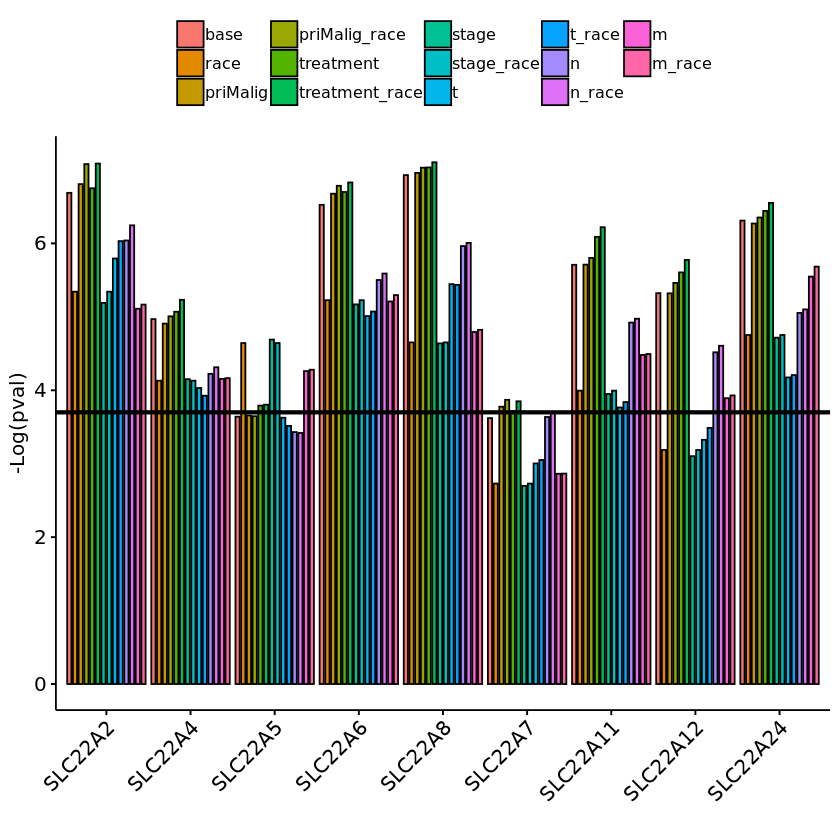

In [42]:
KIRC_coxph.bygene.df <- do.call(rbind.data.frame, lapply(1:length(KIRC_coxph.bygene), function(x) {
    cbind.data.frame(KIRC_coxph.bygene[[x]], rep(names(KIRC_coxph.bygene)[x], Gene=nrow(KIRC_coxph.bygene[[x]])))
}))
colnames(KIRC_coxph.bygene.df)[7] <- "Gene"
KIRC_coxph.bygene.df.filt <- KIRC_coxph.bygene.df[!KIRC_coxph.bygene.df$Gene %in% c("SLC22A18AS", "SLC22A20P"),]

KIRC_coxph.bygene.df.filt <- KIRC_coxph.bygene.df[!KIRC_coxph.bygene.df$Gene %in% c("SLC22A18AS", "SLC22A20P"),]

w_filt <- unique(KIRC_coxph.bygene.df.filt$Gene[KIRC_coxph.bygene.df.filt$negLog.pval > 3.7])
KIRC_coxph.bygene.df.filt2 <- KIRC_coxph.bygene.df.filt[KIRC_coxph.bygene.df.filt$Gene %in% w_filt,]
KIRC_coxph.bygene.df.filt2$comp <- factor(as.character(KIRC_coxph.bygene.df.filt2$comp), levels=c(
"base", "race", "priMalig", "priMalig_race", "treatment", "treatment_race", "stage", "stage_race", "t", "t_race",
"n", "n_race", "m", "m_race"))
#pdf(file="KIRC_SLC22_coxph_analysis_summary_barplot_06162021.pdf", width=10, height=8)
ggbarplot(KIRC_coxph.bygene.df.filt2, x="Gene", y="negLog.pval", fill="comp", xlab="", ylab="-Log(pval)",
          position = position_dodge()) + theme(legend.title=element_text(size=0)) + 
     theme(axis.text.x = element_text(angle = 45, hjust = 1)) + geom_abline(slope = 0, intercept = 3.7, lwd=1.2)
#dev.off()

KIRC_coxph.bygene.df.filt.spl <- split(KIRC_coxph.bygene.df.filt, KIRC_coxph.bygene.df.filt$Gene)
KIRC_coxph.bygene.df.max <- do.call(rbind.data.frame, lapply(KIRC_coxph.bygene.df.filt.spl, function(x) {
    x[which(x$negLog.pval ==max(x$negLog.pval)),]
}))


Warning message in .get_data(model, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”
Warning message in .get_data(model, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


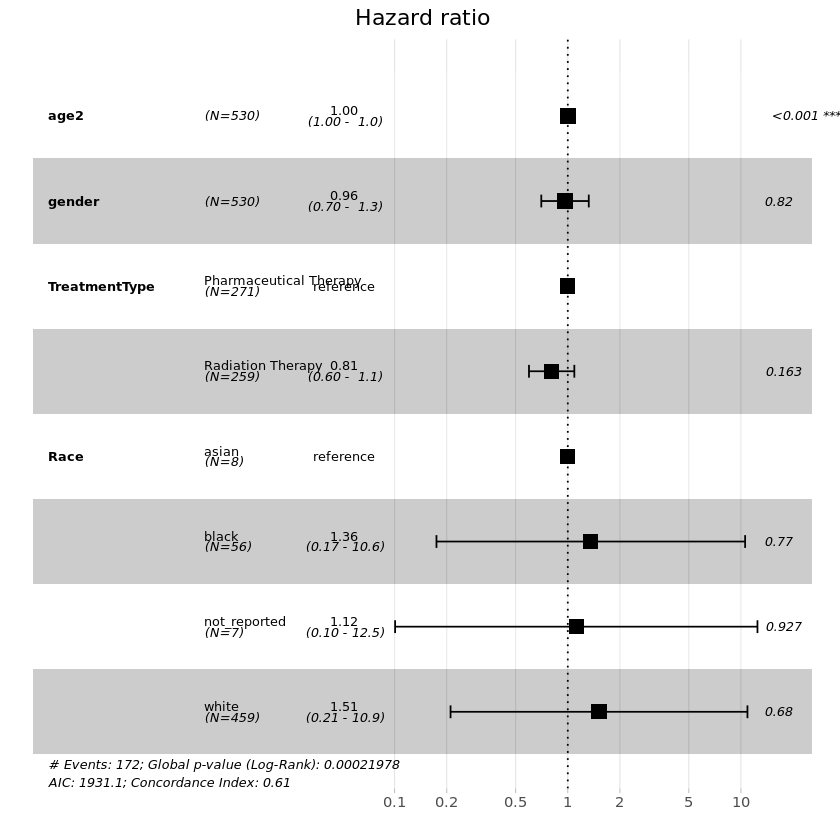

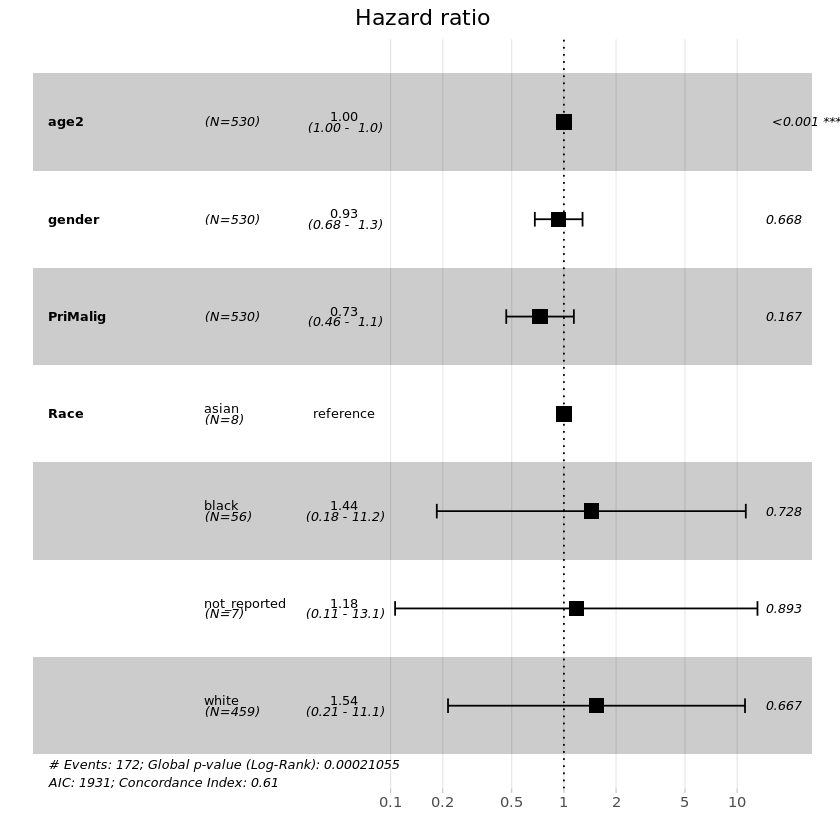

In [43]:
# KIRC - Optimal Cox PH model using 7 genes
KIRC_coxph.out_treatment_race_nogene <- summary(coxph(Surv(time, status) ~age2 + gender + TreatmentType + Race, data=KIRC_surv_inp))
KIRC_coxph.mod_treatment_race_nogene <- coxph(Surv(time, status) ~age2 + gender + TreatmentType + Race, data=KIRC_surv_inp)

ggforest(KIRC_coxph.mod_treatment_race_nogene)

# KIRC - Optimal Cox PH model using SLC22A7
KIRC_coxph.out_priMalig_nogene <- summary(coxph(Surv(time, status) ~age2 + gender + PriMalig + Race, data=KIRC_surv_inp))
KIRC_coxph.mod_priMalig_nogene <- coxph(Surv(time, status) ~age2 + gender + PriMalig + Race, data=KIRC_surv_inp)

ggforest(KIRC_coxph.mod_priMalig_nogene)


In [1]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.2 LTS

Matrix products: default
BLAS/LAPACK: /home/ubuntu/anaconda3/lib/libmkl_rt.so.1

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] fansi_0.5.0     digest_0.6.28   utf8_1.2.2      crayon_1.4.2   
 [5] IRdisplay_1.0   repr_1.1.3      lifecycle_1.0.1 jsonlite_1.7.2 
 [9] evaluate_0.14   pillar_1.6.4    rlang_0.4.12    uuid_1.0-3     
[13] vctrs_0.3.8     ellipsis_0.3.2  IRkernel_1.3    tools_4.0.5    
[17] fastmap_1.1.0   compiler_4.0.5  base64enc_0.1-3 pbdZMQ_0.3-6   
[21] htmltools_0.5.2